<h3>Eye blink data feature extraction method</h3>

In [1]:
def featureExtraction(fileDir, minCount, maxCount, leftLight):
    userHp1 = []
    userLp1 = []
    userLhpl1 = []
    userLlpl1 = []
    userHpl1 = []
    userLpl1 = []
    userLhpg1 = []
    userLlpg1 = []
    userRhpg1 = []
    userRlpg1 = []
    userBlink1 = []
    userNotBlink1 = []
    
    for count in range(minCount, maxCount):
        file = open(fileDir + '/file' + str(count) + '-' + str(leftLight) + '.txt', 'r')
        x = file.read()
        file.close()
    
        x = x.split(',')
    
        data1 = []
    
        for index, item in enumerate(x):
            data1.append(float(item))
        
        for index, item in enumerate(x):
            if(index != len(data1) -1):
                data1[index] = data1[index + 1]
            
        temp = 0
        index = 0

        start1 = []
        middle1 = []
        finish1 = []

        for i in range(0, len(data1)):
            if((temp + 150 < i) and (data1[i] > 100)):
                for j in range(i, 0, -1):
                    if(data1[j] <= 0):
                        start1.append(j)
                        break
                
                for j in range(start1[index] + 1, len(data1)):
                    if(data1[j] <= 0):
                        middle1.append(j)
                        break
                
                for j in range(middle1[index] + 1, len(data1)):
                    if(data1[j] >= 0):
                        finish1.append(j)
                        break
                
                i = finish1[index]
                index = index + 1
                temp = i
   
        temp = 0
    
        hp1 = []
        lp1 = []
        lhpl1 = []
        llpl1 = []
        hpl1 = []
        lpl1 = []
        lhpg1 = []
        llpg1 = []
        rhpg1 = []
        rlpg1 = []
        blink1 = []
        notBlink1 = []
    
        index = 0;
    
        for i in range(start1[0], finish1[len(finish1) - 1]):
            hp1.append(0)
            lp1.append(0)
            lhpl1.append(0)
            llpl1.append(0)
            hpl1.append(0)
            lpl1.append(0)
            lhpg1.append(0)
            llpg1.append(0)
            rhpg1.append(0)
            rlpg1.append(0)
            blink1.append(0)
            notBlink1.append(0)
    
            for j in range(start1[index], finish1[index]):
                if(hp1[index] < data1[j]):
                    hp1[index] = data1[j]
                    lhpl1[index] = j - start1[index]
    
            for j in range(start1[index], finish1[index]):
                if(hp1[index] > data1[j]):
                    lp1[index] = data1[j]
                    llpl1[index] = j - start1[index]
            
            hpl1[index] = middle1[index] - start1[index]
            lpl1[index] = finish1[index] - middle1[index]
    
            lhpg1[index] = hp1[index] / lhpl1[index]
            llpg1[index] = lp1[index] / llpl1[index]
            rhpg1[index] = hp1[index] / (hpl1[index] - lhpg1[index])
            rlpg1[index] = lp1[index] / (lpl1[index] - llpl1[index])
    
            index = index + 1
    
            if(len(start1) == index):
                break
    
            i = start1[index]
        
        index = 0;
        
        for i in range(0, len(finish1)):
            blink1[i] = finish1[i] - start1[i]

        for i in range(0, len(finish1) - 1):
            notBlink1[i] = start1[i + 1] - finish1[i]
        
        for i in range(0, len(finish1)):
            userHp1.append(hp1[i])
            userLp1.append(lp1[i])
            userLhpl1.append(lhpl1[i])
            userLlpl1.append(llpl1[i])
            userHpl1.append(hpl1[i])
            userLpl1.append(lpl1[i])
            userLhpg1.append(lhpg1[i])
            userLlpg1.append(llpg1[i])
            userRhpg1.append(rhpg1[i])
            userRlpg1.append(rlpg1[i])
            userBlink1.append(blink1[i])
            userNotBlink1.append(notBlink1[i])
            
    return userHp1, userLp1, userLhpl1, userLlpl1, userHpl1, userLpl1, userLhpg1, userLlpg1, userRhpg1, userRlpg1, userBlink1, userNotBlink1

<hr>
<h3>user1 data extraction</h3>

In [2]:
user1Data  = []
user1Label = []

In [3]:
userHp1, userLp1, userLhpl1, userLlpl1, userHpl1, userLpl1, userLhpg1, userLlpg1, userRhpg1, userRlpg1, userBlink1, userNotBlink1 = featureExtraction('C:/EOGData/user1', 0, 49, 1)

In [4]:
userHp2, userLp2, userLhpl2, userLlpl2, userHpl2, userLpl2, userLhpg2, userLlpg2, userRhpg2, userRlpg2, userBlink2, userNotBlink2 = featureExtraction('C:/EOGData/user1', 0, 49, 2)

In [5]:
sum = len(userHp1) +len(userHp2)

In [6]:
userHp1 = userHp1 + userHp2
userLp1 = userLp1 + userLp2
userLhpl1 = userLhpl1 + userLhpl2
userLlpl1 = userLlpl1 + userLlpl2
userHpl1 = userHpl1 + userHpl2
userLpl1 = userLpl1 + userLpl2
userLhpg1 = userLhpg1 + userLhpg2
userLlpg1 = userLlpg1 + userLlpg2
userRhpg1 = userRhpg1 + userRhpg2
userRlpg1 = userRlpg1 + userRlpg2
userBlink1 = userBlink1 + userBlink2
userNotBlink1 = userNotBlink1 + userNotBlink2

In [7]:
for i in range(0, sum):
    user1Data.append([userHp1[i], userLp1[i], userLhpl1[i], userLlpl1[i], userHpl1[i], userLpl1[i], userLhpg1[i], userLlpg1[i], userRhpg1[i], userRlpg1[i]])
    user1Label.append(0)

<hr>
<h3>user2 data extraction</h3>

In [8]:
user2Data  = []
user2Label = []

In [9]:
userHp1, userLp1, userLhpl1, userLlpl1, userHpl1, userLpl1, userLhpg1, userLlpg1, userRhpg1, userRlpg1, userBlink1, userNotBlink1 = featureExtraction('C:/EOGData/user2', 0, 49, 1)

In [10]:
userHp2, userLp2, userLhpl2, userLlpl2, userHpl2, userLpl2, userLhpg2, userLlpg2, userRhpg2, userRlpg2, userBlink2, userNotBlink2 = featureExtraction('C:/EOGData/user2', 0, 49, 2)

In [11]:
sum = len(userHp1) +len(userHp2)

In [12]:
userHp1 = userHp1 + userHp2
userLp1 = userLp1 + userLp2
userLhpl1 = userLhpl1 + userLhpl2
userLlpl1 = userLlpl1 + userLlpl2
userHpl1 = userHpl1 + userHpl2
userLpl1 = userLpl1 + userLpl2
userLhpg1 = userLhpg1 + userLhpg2
userLlpg1 = userLlpg1 + userLlpg2
userRhpg1 = userRhpg1 + userRhpg2
userRlpg1 = userRlpg1 + userRlpg2
userBlink1 = userBlink1 + userBlink2
userNotBlink1 = userNotBlink1 + userNotBlink2

In [13]:
for i in range(0, sum):
    user2Data.append([userHp1[i], userLp1[i], userLhpl1[i], userLlpl1[i], userHpl1[i], userLpl1[i], userLhpg1[i], userLlpg1[i], userRhpg1[i], userRlpg1[i]])
    user2Label.append(1)

<hr>
<h3>Artifact data extraction</h3>

In [14]:
user3Data  = []
user3Label = []

In [15]:
userHp1, userLp1, userLhpl1, userLlpl1, userHpl1, userLpl1, userLhpg1, userLlpg1, userRhpg1, userRlpg1, userBlink1, userNotBlink1 = featureExtraction('C:/EOGData/artifact/doridori', 0, 3, 1)

In [16]:
userHp2, userLp2, userLhpl2, userLlpl2, userHpl2, userLpl2, userLhpg2, userLlpg2, userRhpg2, userRlpg2, userBlink2, userNotBlink2 = featureExtraction('C:/EOGData/artifact/doridori', 0, 3, 2)

In [17]:
sum = len(userHp1) +len(userHp2)

In [18]:
userHp1 = userHp1 + userHp2
userLp1 = userLp1 + userLp2
userLhpl1 = userLhpl1 + userLhpl2
userLlpl1 = userLlpl1 + userLlpl2
userHpl1 = userHpl1 + userHpl2
userLpl1 = userLpl1 + userLpl2
userLhpg1 = userLhpg1 + userLhpg2
userLlpg1 = userLlpg1 + userLlpg2
userRhpg1 = userRhpg1 + userRhpg2
userRlpg1 = userRlpg1 + userRlpg2
userBlink1 = userBlink1 + userBlink2
userNotBlink1 = userNotBlink1 + userNotBlink2

In [19]:
for i in range(0, sum):
    user3Data.append([userHp1[i], userLp1[i], userLhpl1[i], userLlpl1[i], userHpl1[i], userLpl1[i], userLhpg1[i], userLlpg1[i], userRhpg1[i], userRlpg1[i]])
    user3Label.append(2)

<hr>
<h3>Eye blink data preprocessing</h3>

In [20]:
import numpy as np

In [21]:
user1Data = np.array(user1Data)
user2Data = np.array(user2Data)
user3Data = np.array(user3Data)

user1Label = np.array(user1Label)
user2Label = np.array(user2Label)
user3Label = np.array(user3Label)

In [22]:
print('Number of user1 data', len(user1Data))

Number of user1 data 841


In [23]:
print('Number of user2 data', len(user2Data))

Number of user2 data 1516


In [24]:
print('Number of artifact data', len(user3Data))

Number of artifact data 882


<hr>
<h3>Data sum</h3>

In [25]:
data = np.concatenate((user1Data, user2Data, user3Data), axis=0)

In [26]:
len(data)

3239

In [27]:
label = np.concatenate((user1Label, user2Label, user3Label), axis=0)

In [28]:
len(label)

3239

<hr>
<h3>Data mixing</h3>

In [29]:
s = np.arange(data.shape[0])
np.random.shuffle(s)

In [30]:
data = data[s]
label = label[s]

In [31]:
label

array([1, 1, 1, ..., 1, 1, 2])

<hr>
<h3>Data sharing & create labels</h3>

In [32]:
tempLabel = []
testLabel = label[2600:]

In [33]:
for i in range(0, len(label)):
    if(label[i] == 0):
        tempLabel.append([1, 0])
    elif(label[i] == 1):
        tempLabel.append([1, 0])
    else:
        tempLabel.append([0, 1])

In [34]:
label = tempLabel

In [35]:
label = np.array(label)

In [36]:
train_data = data[:2000]
val_data = data[2000:2600]
test_data = data[2600:]

train_label = label[:2000]
val_label = label[2000:2600]
test_label = label[2600:]

myData = data[:2600]
myLabel = label[:2600]

<hr>
<h3>Data regularization</h3>

In [37]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

val_data -= mean
val_data /= std

test_data -= mean
test_data /= std

<hr>
<h3>import modules</h3>

In [38]:
from keras import models
from keras import layers
from keras import regularizers
from keras import optimizers

Using TensorFlow backend.
C:\Users\USER\AppData\Local\conda\conda\envs\venv\lib\site-packages\tensorflow\python\framework\dtypes.py:469: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\USER\AppData\Local\conda\conda\envs\venv\lib\site-packages\tensorflow\python\framework\dtypes.py:470: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\USER\AppData\Local\conda\conda\envs\venv\lib\site-packages\tensorflow\python\framework\dtypes.py:471: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Us

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import pandas as pd
from sklearn.metrics import auc
from sklearn.metrics import roc_curve, roc_auc_score

import matplotlib as mpl
import matplotlib.pyplot as plt

<hr>
<h3>Make model function</h3>

In [40]:
def build_model(actiFunc, lossFunc, hidden, node, dropout):
    model = models.Sequential()
    
    model.add(layers.Dense(node[0], activation=actiFunc, input_shape=(10, )))
    model.add(layers.Dropout(dropout))
    
    if(hidden == 2):
        model.add(layers.Dense(node[1], activation=actiFunc))
        model.add(layers.Dropout(dropout))
    
    if(hidden == 3):
        model.add(layers.Dense(node[1], activation=actiFunc))
        model.add(layers.Dropout(dropout))
        model.add(layers.Dense(node[2], activation=actiFunc))
        model.add(layers.Dropout(dropout))
        
    if(hidden == 4):
        model.add(layers.Dense(node[1], activation=actiFunc))
        model.add(layers.Dropout(dropout))
        model.add(layers.Dense(node[2], activation=actiFunc))
        model.add(layers.Dropout(dropout))
        model.add(layers.Dense(node[3], activation=actiFunc))
        model.add(layers.Dropout(dropout))
    
    model.add(layers.Dense(2, activation='softmax'))
    model.compile(optimizer='rmsprop', loss=lossFunc, metrics=['accuracy'])
    return model

<hr>
<h3>result</h3>

Activation: relu   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 16 , 8 , 4 ]  BatchSize: 512   Dropout: 0
처리 중인 폴드 # 0
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                176       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dropout_2 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 36        
_________________________________________________________________
dropout_3 (Dropout)          (None, 4)                 0         
___________

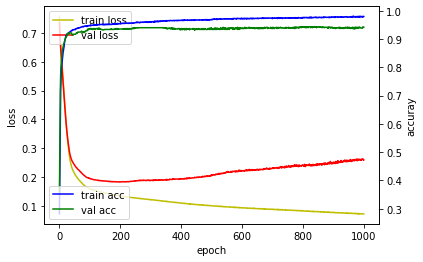





처리 중인 폴드 # 1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 16)                176       
_________________________________________________________________
dropout_4 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 136       
_________________________________________________________________
dropout_5 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 36        
_________________________________________________________________
dropout_6 (Dropout)          (None, 4)                 0         
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 10  

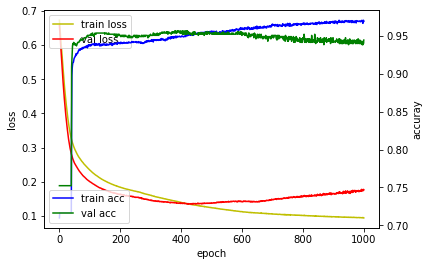





처리 중인 폴드 # 2
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 16)                176       
_________________________________________________________________
dropout_7 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 8)                 136       
_________________________________________________________________
dropout_8 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_11 (Dense)             (None, 4)                 36        
_________________________________________________________________
dropout_9 (Dropout)          (None, 4)                 0         
_________________________________________________________________
dense_12 (Dense)             (None, 2)                 10  

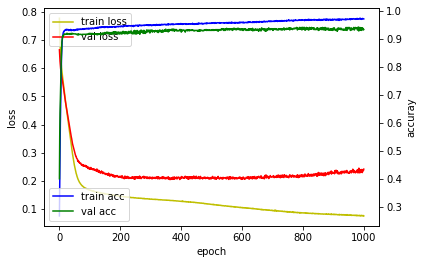





처리 중인 폴드 # 3
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 16)                176       
_________________________________________________________________
dropout_10 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 8)                 136       
_________________________________________________________________
dropout_11 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_15 (Dense)             (None, 4)                 36        
_________________________________________________________________
dropout_12 (Dropout)         (None, 4)                 0         
_________________________________________________________________
dense_16 (Dense)             (None, 2)                 10  

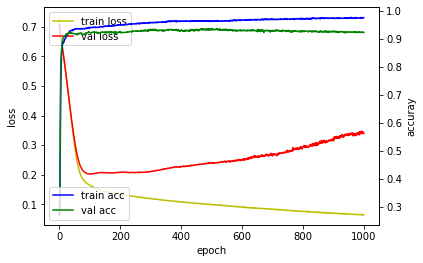





Activation: relu   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 16 , 8 , 4 ]  BatchSize: 512   Dropout: 0.1
처리 중인 폴드 # 0
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 16)                176       
_________________________________________________________________
dropout_13 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 8)                 136       
_________________________________________________________________
dropout_14 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_19 (Dense)             (None, 4)                 36        
_________________________________________________________________
dropout_15 (Dropout)         (None, 4)                 0         
_____

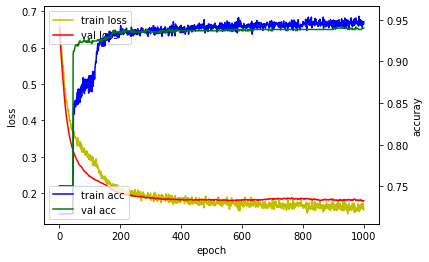





처리 중인 폴드 # 1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 16)                176       
_________________________________________________________________
dropout_16 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 8)                 136       
_________________________________________________________________
dropout_17 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_23 (Dense)             (None, 4)                 36        
_________________________________________________________________
dropout_18 (Dropout)         (None, 4)                 0         
_________________________________________________________________
dense_24 (Dense)             (None, 2)                 10  

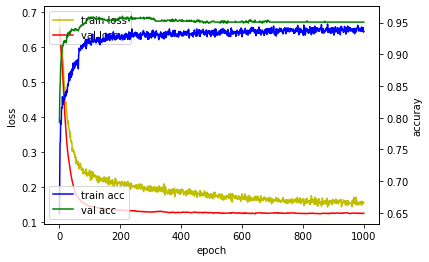





처리 중인 폴드 # 2
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 16)                176       
_________________________________________________________________
dropout_19 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 8)                 136       
_________________________________________________________________
dropout_20 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_27 (Dense)             (None, 4)                 36        
_________________________________________________________________
dropout_21 (Dropout)         (None, 4)                 0         
_________________________________________________________________
dense_28 (Dense)             (None, 2)                 10  

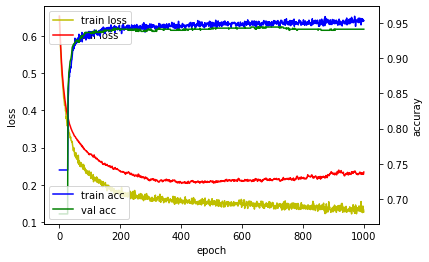





처리 중인 폴드 # 3
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 16)                176       
_________________________________________________________________
dropout_22 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_30 (Dense)             (None, 8)                 136       
_________________________________________________________________
dropout_23 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_31 (Dense)             (None, 4)                 36        
_________________________________________________________________
dropout_24 (Dropout)         (None, 4)                 0         
_________________________________________________________________
dense_32 (Dense)             (None, 2)                 10  

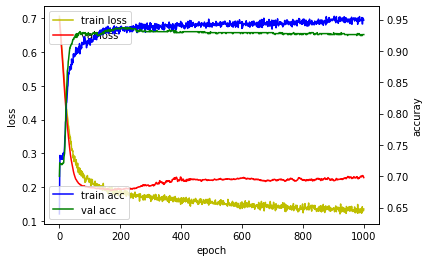





Activation: relu   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 16 , 8 , 8 ]  BatchSize: 512   Dropout: 0
처리 중인 폴드 # 0
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 16)                176       
_________________________________________________________________
dropout_25 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_34 (Dense)             (None, 8)                 136       
_________________________________________________________________
dropout_26 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_35 (Dense)             (None, 8)                 72        
_________________________________________________________________
dropout_27 (Dropout)         (None, 8)                 0         
_______

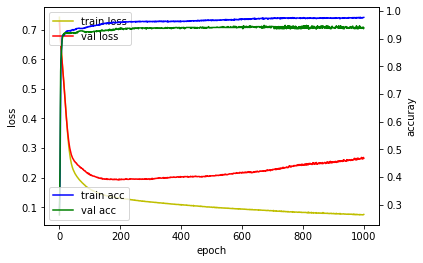





처리 중인 폴드 # 1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 16)                176       
_________________________________________________________________
dropout_28 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_38 (Dense)             (None, 8)                 136       
_________________________________________________________________
dropout_29 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_39 (Dense)             (None, 8)                 72        
_________________________________________________________________
dropout_30 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_40 (Dense)             (None, 2)                 18  

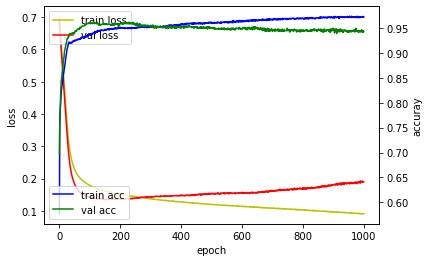





처리 중인 폴드 # 2
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 16)                176       
_________________________________________________________________
dropout_31 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_42 (Dense)             (None, 8)                 136       
_________________________________________________________________
dropout_32 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_43 (Dense)             (None, 8)                 72        
_________________________________________________________________
dropout_33 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_44 (Dense)             (None, 2)                 18  

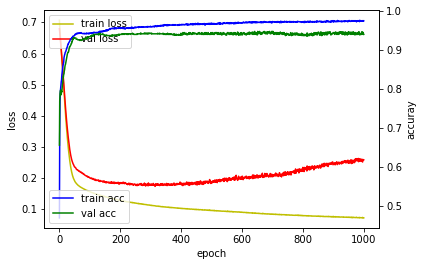





처리 중인 폴드 # 3
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 16)                176       
_________________________________________________________________
dropout_34 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_46 (Dense)             (None, 8)                 136       
_________________________________________________________________
dropout_35 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_47 (Dense)             (None, 8)                 72        
_________________________________________________________________
dropout_36 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_48 (Dense)             (None, 2)                 18  

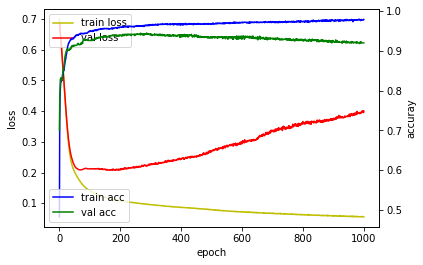





Activation: relu   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 16 , 8 , 8 ]  BatchSize: 512   Dropout: 0.1
처리 중인 폴드 # 0
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_49 (Dense)             (None, 16)                176       
_________________________________________________________________
dropout_37 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_50 (Dense)             (None, 8)                 136       
_________________________________________________________________
dropout_38 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_51 (Dense)             (None, 8)                 72        
_________________________________________________________________
dropout_39 (Dropout)         (None, 8)                 0         
_____

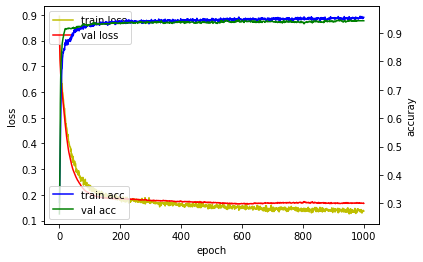





처리 중인 폴드 # 1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_53 (Dense)             (None, 16)                176       
_________________________________________________________________
dropout_40 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_54 (Dense)             (None, 8)                 136       
_________________________________________________________________
dropout_41 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_55 (Dense)             (None, 8)                 72        
_________________________________________________________________
dropout_42 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_56 (Dense)             (None, 2)                 18  

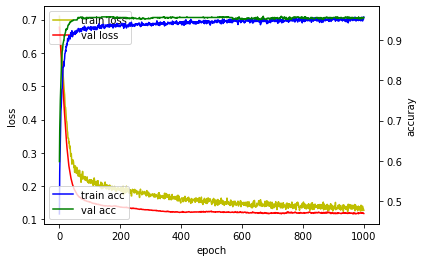





처리 중인 폴드 # 2
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_57 (Dense)             (None, 16)                176       
_________________________________________________________________
dropout_43 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_58 (Dense)             (None, 8)                 136       
_________________________________________________________________
dropout_44 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_59 (Dense)             (None, 8)                 72        
_________________________________________________________________
dropout_45 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_60 (Dense)             (None, 2)                 18  

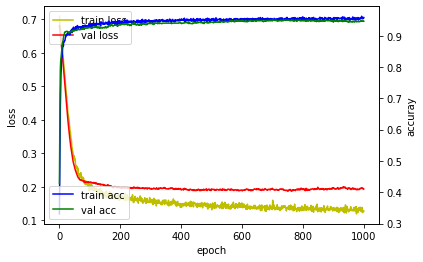





처리 중인 폴드 # 3
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_61 (Dense)             (None, 16)                176       
_________________________________________________________________
dropout_46 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_62 (Dense)             (None, 8)                 136       
_________________________________________________________________
dropout_47 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_63 (Dense)             (None, 8)                 72        
_________________________________________________________________
dropout_48 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_64 (Dense)             (None, 2)                 18  

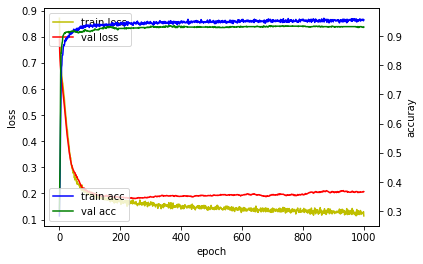





Activation: relu   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 16 , 8 , 16 ]  BatchSize: 512   Dropout: 0
처리 중인 폴드 # 0
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_65 (Dense)             (None, 16)                176       
_________________________________________________________________
dropout_49 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_66 (Dense)             (None, 8)                 136       
_________________________________________________________________
dropout_50 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_67 (Dense)             (None, 16)                144       
_________________________________________________________________
dropout_51 (Dropout)         (None, 16)                0         
______

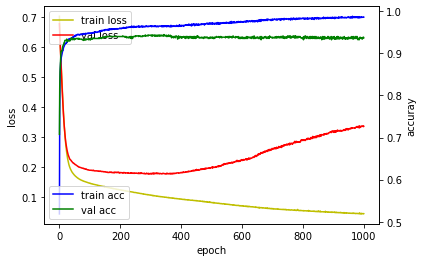





처리 중인 폴드 # 1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_69 (Dense)             (None, 16)                176       
_________________________________________________________________
dropout_52 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_70 (Dense)             (None, 8)                 136       
_________________________________________________________________
dropout_53 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_71 (Dense)             (None, 16)                144       
_________________________________________________________________
dropout_54 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_72 (Dense)             (None, 2)                 34  

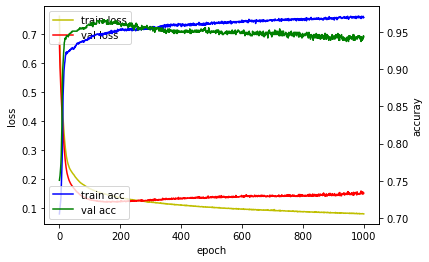





처리 중인 폴드 # 2
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_73 (Dense)             (None, 16)                176       
_________________________________________________________________
dropout_55 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_74 (Dense)             (None, 8)                 136       
_________________________________________________________________
dropout_56 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_75 (Dense)             (None, 16)                144       
_________________________________________________________________
dropout_57 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_76 (Dense)             (None, 2)                 34  

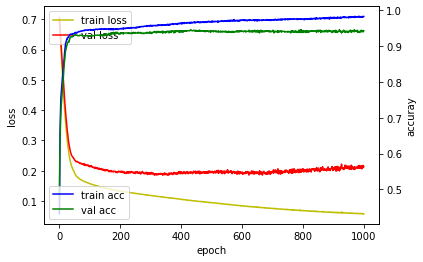





처리 중인 폴드 # 3
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_77 (Dense)             (None, 16)                176       
_________________________________________________________________
dropout_58 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_78 (Dense)             (None, 8)                 136       
_________________________________________________________________
dropout_59 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_79 (Dense)             (None, 16)                144       
_________________________________________________________________
dropout_60 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_80 (Dense)             (None, 2)                 34  

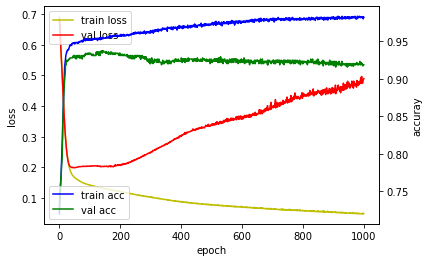





Activation: relu   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 16 , 8 , 16 ]  BatchSize: 512   Dropout: 0.1
처리 중인 폴드 # 0
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_81 (Dense)             (None, 16)                176       
_________________________________________________________________
dropout_61 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_82 (Dense)             (None, 8)                 136       
_________________________________________________________________
dropout_62 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_83 (Dense)             (None, 16)                144       
_________________________________________________________________
dropout_63 (Dropout)         (None, 16)                0         
____

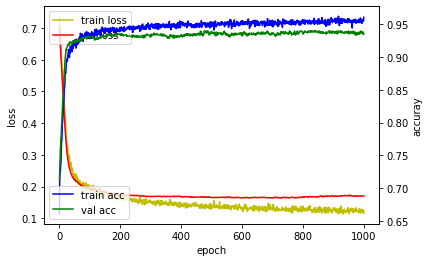





처리 중인 폴드 # 1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_85 (Dense)             (None, 16)                176       
_________________________________________________________________
dropout_64 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_86 (Dense)             (None, 8)                 136       
_________________________________________________________________
dropout_65 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_87 (Dense)             (None, 16)                144       
_________________________________________________________________
dropout_66 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_88 (Dense)             (None, 2)                 34  

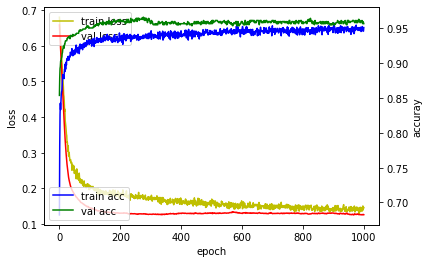





처리 중인 폴드 # 2
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_89 (Dense)             (None, 16)                176       
_________________________________________________________________
dropout_67 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_90 (Dense)             (None, 8)                 136       
_________________________________________________________________
dropout_68 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_91 (Dense)             (None, 16)                144       
_________________________________________________________________
dropout_69 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_92 (Dense)             (None, 2)                 34  

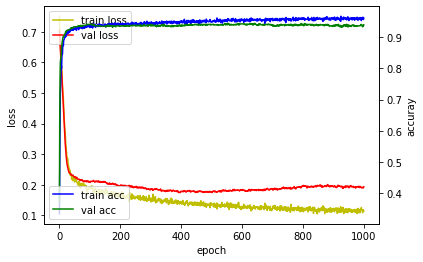





처리 중인 폴드 # 3
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_93 (Dense)             (None, 16)                176       
_________________________________________________________________
dropout_70 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_94 (Dense)             (None, 8)                 136       
_________________________________________________________________
dropout_71 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_95 (Dense)             (None, 16)                144       
_________________________________________________________________
dropout_72 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_96 (Dense)             (None, 2)                 34  

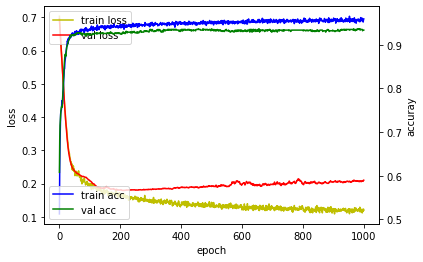





Activation: relu   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 16 , 16 , 4 ]  BatchSize: 512   Dropout: 0
처리 중인 폴드 # 0
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_97 (Dense)             (None, 16)                176       
_________________________________________________________________
dropout_73 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_98 (Dense)             (None, 16)                272       
_________________________________________________________________
dropout_74 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_99 (Dense)             (None, 4)                 68        
_________________________________________________________________
dropout_75 (Dropout)         (None, 4)                 0         
______

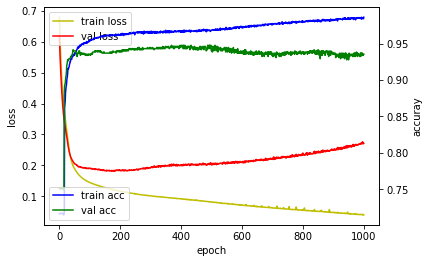





처리 중인 폴드 # 1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_101 (Dense)            (None, 16)                176       
_________________________________________________________________
dropout_76 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_102 (Dense)            (None, 16)                272       
_________________________________________________________________
dropout_77 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_103 (Dense)            (None, 4)                 68        
_________________________________________________________________
dropout_78 (Dropout)         (None, 4)                 0         
_________________________________________________________________
dense_104 (Dense)            (None, 2)                 10  

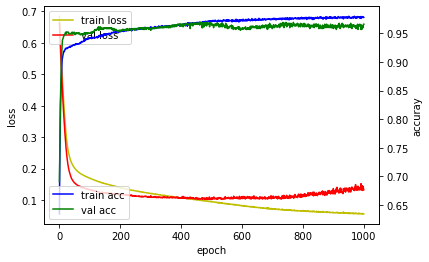





처리 중인 폴드 # 2
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_105 (Dense)            (None, 16)                176       
_________________________________________________________________
dropout_79 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_106 (Dense)            (None, 16)                272       
_________________________________________________________________
dropout_80 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_107 (Dense)            (None, 4)                 68        
_________________________________________________________________
dropout_81 (Dropout)         (None, 4)                 0         
_________________________________________________________________
dense_108 (Dense)            (None, 2)                 10  

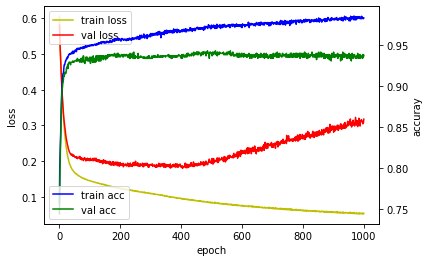





처리 중인 폴드 # 3
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_109 (Dense)            (None, 16)                176       
_________________________________________________________________
dropout_82 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_110 (Dense)            (None, 16)                272       
_________________________________________________________________
dropout_83 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_111 (Dense)            (None, 4)                 68        
_________________________________________________________________
dropout_84 (Dropout)         (None, 4)                 0         
_________________________________________________________________
dense_112 (Dense)            (None, 2)                 10  

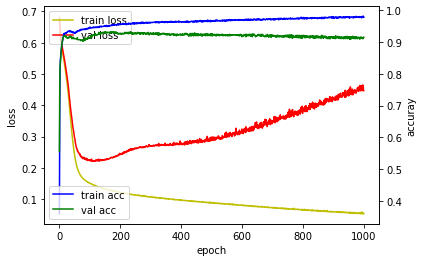





Activation: relu   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 16 , 16 , 4 ]  BatchSize: 512   Dropout: 0.1
처리 중인 폴드 # 0
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_113 (Dense)            (None, 16)                176       
_________________________________________________________________
dropout_85 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_114 (Dense)            (None, 16)                272       
_________________________________________________________________
dropout_86 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_115 (Dense)            (None, 4)                 68        
_________________________________________________________________
dropout_87 (Dropout)         (None, 4)                 0         
____

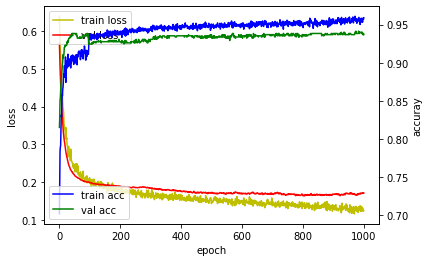





처리 중인 폴드 # 1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_117 (Dense)            (None, 16)                176       
_________________________________________________________________
dropout_88 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_118 (Dense)            (None, 16)                272       
_________________________________________________________________
dropout_89 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_119 (Dense)            (None, 4)                 68        
_________________________________________________________________
dropout_90 (Dropout)         (None, 4)                 0         
_________________________________________________________________
dense_120 (Dense)            (None, 2)                 10  

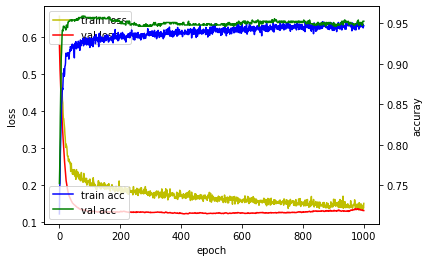





처리 중인 폴드 # 2
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_121 (Dense)            (None, 16)                176       
_________________________________________________________________
dropout_91 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_122 (Dense)            (None, 16)                272       
_________________________________________________________________
dropout_92 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_123 (Dense)            (None, 4)                 68        
_________________________________________________________________
dropout_93 (Dropout)         (None, 4)                 0         
_________________________________________________________________
dense_124 (Dense)            (None, 2)                 10  

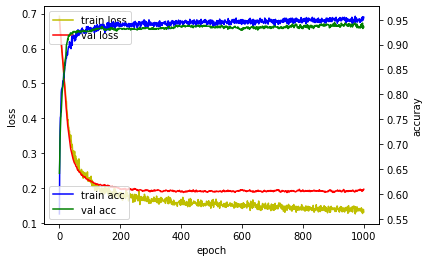





처리 중인 폴드 # 3
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_125 (Dense)            (None, 16)                176       
_________________________________________________________________
dropout_94 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_126 (Dense)            (None, 16)                272       
_________________________________________________________________
dropout_95 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_127 (Dense)            (None, 4)                 68        
_________________________________________________________________
dropout_96 (Dropout)         (None, 4)                 0         
_________________________________________________________________
dense_128 (Dense)            (None, 2)                 10  

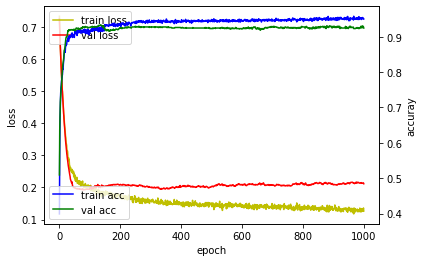





Activation: relu   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 16 , 16 , 8 ]  BatchSize: 512   Dropout: 0
처리 중인 폴드 # 0
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_129 (Dense)            (None, 16)                176       
_________________________________________________________________
dropout_97 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_130 (Dense)            (None, 16)                272       
_________________________________________________________________
dropout_98 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_131 (Dense)            (None, 8)                 136       
_________________________________________________________________
dropout_99 (Dropout)         (None, 8)                 0         
______

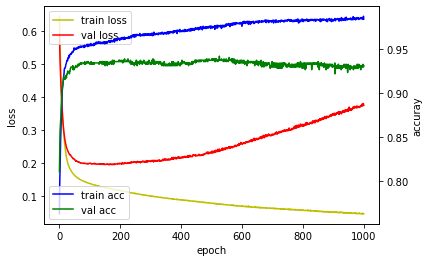





처리 중인 폴드 # 1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_133 (Dense)            (None, 16)                176       
_________________________________________________________________
dropout_100 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_134 (Dense)            (None, 16)                272       
_________________________________________________________________
dropout_101 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_135 (Dense)            (None, 8)                 136       
_________________________________________________________________
dropout_102 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_136 (Dense)            (None, 2)                 18  

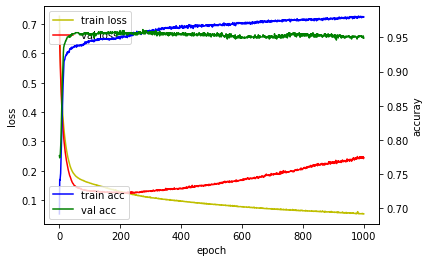





처리 중인 폴드 # 2
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_137 (Dense)            (None, 16)                176       
_________________________________________________________________
dropout_103 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_138 (Dense)            (None, 16)                272       
_________________________________________________________________
dropout_104 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_139 (Dense)            (None, 8)                 136       
_________________________________________________________________
dropout_105 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_140 (Dense)            (None, 2)                 18  

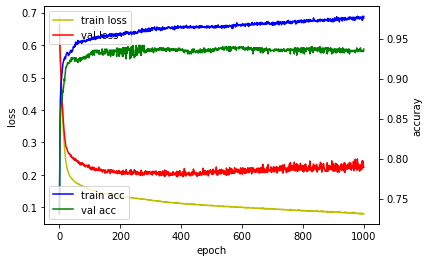





처리 중인 폴드 # 3
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_141 (Dense)            (None, 16)                176       
_________________________________________________________________
dropout_106 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_142 (Dense)            (None, 16)                272       
_________________________________________________________________
dropout_107 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_143 (Dense)            (None, 8)                 136       
_________________________________________________________________
dropout_108 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_144 (Dense)            (None, 2)                 18  

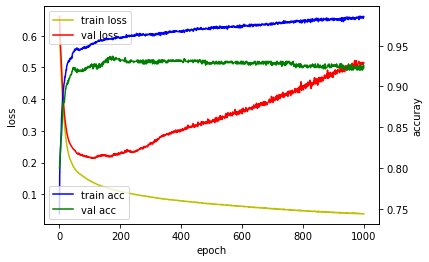





Activation: relu   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 16 , 16 , 8 ]  BatchSize: 512   Dropout: 0.1
처리 중인 폴드 # 0
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_145 (Dense)            (None, 16)                176       
_________________________________________________________________
dropout_109 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_146 (Dense)            (None, 16)                272       
_________________________________________________________________
dropout_110 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_147 (Dense)            (None, 8)                 136       
_________________________________________________________________
dropout_111 (Dropout)        (None, 8)                 0         
____

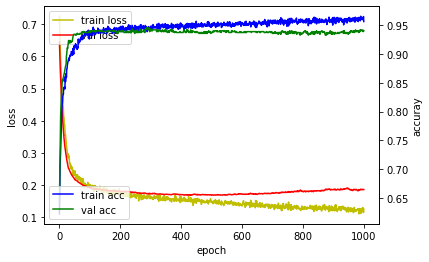





처리 중인 폴드 # 1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_149 (Dense)            (None, 16)                176       
_________________________________________________________________
dropout_112 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_150 (Dense)            (None, 16)                272       
_________________________________________________________________
dropout_113 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_151 (Dense)            (None, 8)                 136       
_________________________________________________________________
dropout_114 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_152 (Dense)            (None, 2)                 18  

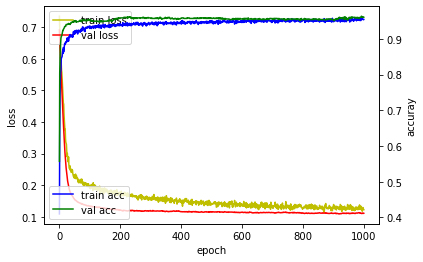





처리 중인 폴드 # 2
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_153 (Dense)            (None, 16)                176       
_________________________________________________________________
dropout_115 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_154 (Dense)            (None, 16)                272       
_________________________________________________________________
dropout_116 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_155 (Dense)            (None, 8)                 136       
_________________________________________________________________
dropout_117 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_156 (Dense)            (None, 2)                 18  

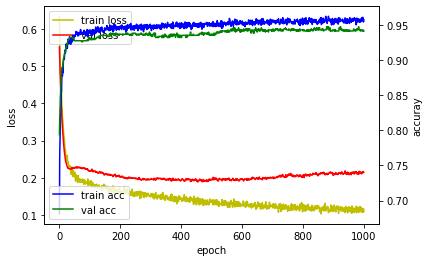





처리 중인 폴드 # 3
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_157 (Dense)            (None, 16)                176       
_________________________________________________________________
dropout_118 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_158 (Dense)            (None, 16)                272       
_________________________________________________________________
dropout_119 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_159 (Dense)            (None, 8)                 136       
_________________________________________________________________
dropout_120 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_160 (Dense)            (None, 2)                 18  

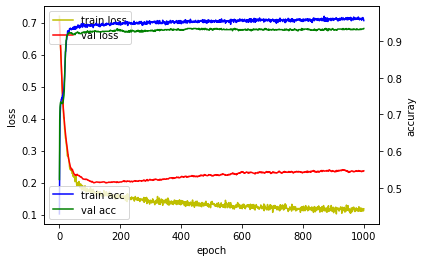





Activation: relu   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 16 , 16 , 16 ]  BatchSize: 512   Dropout: 0
처리 중인 폴드 # 0
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_161 (Dense)            (None, 16)                176       
_________________________________________________________________
dropout_121 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_162 (Dense)            (None, 16)                272       
_________________________________________________________________
dropout_122 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_163 (Dense)            (None, 16)                272       
_________________________________________________________________
dropout_123 (Dropout)        (None, 16)                0         
_____

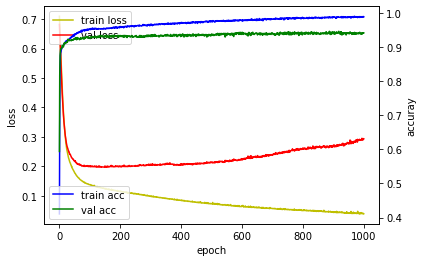





처리 중인 폴드 # 1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_165 (Dense)            (None, 16)                176       
_________________________________________________________________
dropout_124 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_166 (Dense)            (None, 16)                272       
_________________________________________________________________
dropout_125 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_167 (Dense)            (None, 16)                272       
_________________________________________________________________
dropout_126 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_168 (Dense)            (None, 2)                 34  

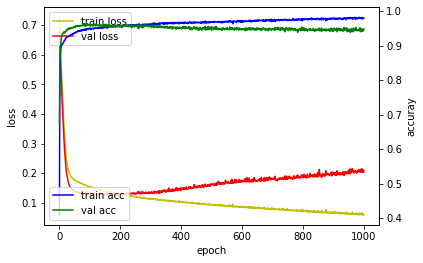





처리 중인 폴드 # 2
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_169 (Dense)            (None, 16)                176       
_________________________________________________________________
dropout_127 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_170 (Dense)            (None, 16)                272       
_________________________________________________________________
dropout_128 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_171 (Dense)            (None, 16)                272       
_________________________________________________________________
dropout_129 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_172 (Dense)            (None, 2)                 34  

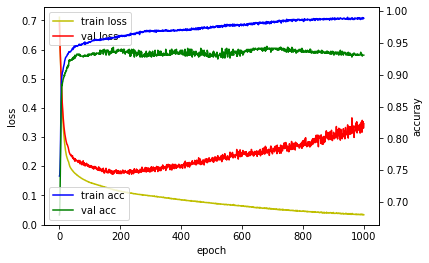





처리 중인 폴드 # 3
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_173 (Dense)            (None, 16)                176       
_________________________________________________________________
dropout_130 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_174 (Dense)            (None, 16)                272       
_________________________________________________________________
dropout_131 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_175 (Dense)            (None, 16)                272       
_________________________________________________________________
dropout_132 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_176 (Dense)            (None, 2)                 34  

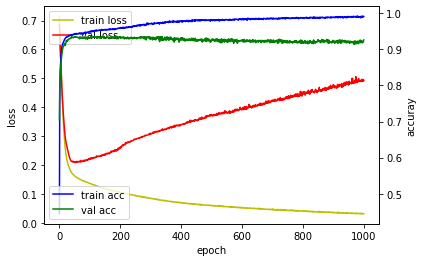





Activation: relu   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 16 , 16 , 16 ]  BatchSize: 512   Dropout: 0.1
처리 중인 폴드 # 0
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_177 (Dense)            (None, 16)                176       
_________________________________________________________________
dropout_133 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_178 (Dense)            (None, 16)                272       
_________________________________________________________________
dropout_134 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_179 (Dense)            (None, 16)                272       
_________________________________________________________________
dropout_135 (Dropout)        (None, 16)                0         
___

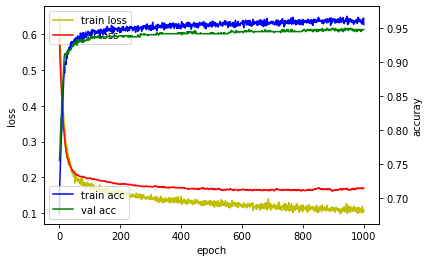





처리 중인 폴드 # 1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_181 (Dense)            (None, 16)                176       
_________________________________________________________________
dropout_136 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_182 (Dense)            (None, 16)                272       
_________________________________________________________________
dropout_137 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_183 (Dense)            (None, 16)                272       
_________________________________________________________________
dropout_138 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_184 (Dense)            (None, 2)                 34  

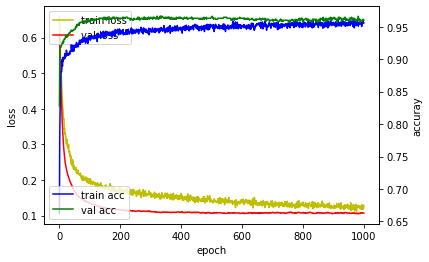





처리 중인 폴드 # 2
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_185 (Dense)            (None, 16)                176       
_________________________________________________________________
dropout_139 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_186 (Dense)            (None, 16)                272       
_________________________________________________________________
dropout_140 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_187 (Dense)            (None, 16)                272       
_________________________________________________________________
dropout_141 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_188 (Dense)            (None, 2)                 34  

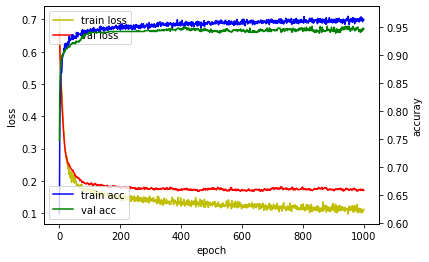





처리 중인 폴드 # 3
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_189 (Dense)            (None, 16)                176       
_________________________________________________________________
dropout_142 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_190 (Dense)            (None, 16)                272       
_________________________________________________________________
dropout_143 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_191 (Dense)            (None, 16)                272       
_________________________________________________________________
dropout_144 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_192 (Dense)            (None, 2)                 34  

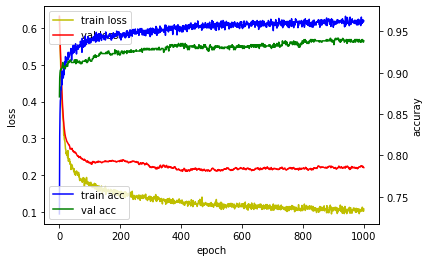





Activation: relu   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 32 , 8 , 4 ]  BatchSize: 512   Dropout: 0
처리 중인 폴드 # 0
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_193 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_145 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_194 (Dense)            (None, 8)                 264       
_________________________________________________________________
dropout_146 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_195 (Dense)            (None, 4)                 36        
_________________________________________________________________
dropout_147 (Dropout)        (None, 4)                 0         
_______

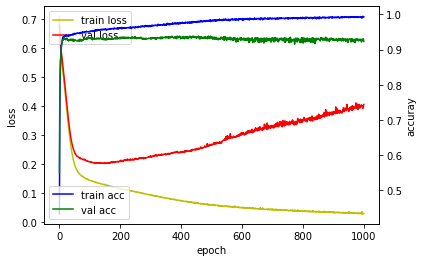





처리 중인 폴드 # 1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_197 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_148 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_198 (Dense)            (None, 8)                 264       
_________________________________________________________________
dropout_149 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_199 (Dense)            (None, 4)                 36        
_________________________________________________________________
dropout_150 (Dropout)        (None, 4)                 0         
_________________________________________________________________
dense_200 (Dense)            (None, 2)                 10  

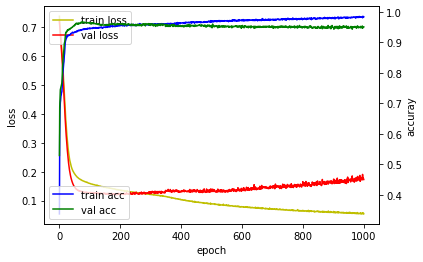





처리 중인 폴드 # 2
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_201 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_151 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_202 (Dense)            (None, 8)                 264       
_________________________________________________________________
dropout_152 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_203 (Dense)            (None, 4)                 36        
_________________________________________________________________
dropout_153 (Dropout)        (None, 4)                 0         
_________________________________________________________________
dense_204 (Dense)            (None, 2)                 10  

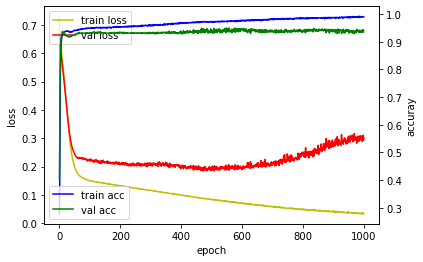





처리 중인 폴드 # 3
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_205 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_154 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_206 (Dense)            (None, 8)                 264       
_________________________________________________________________
dropout_155 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_207 (Dense)            (None, 4)                 36        
_________________________________________________________________
dropout_156 (Dropout)        (None, 4)                 0         
_________________________________________________________________
dense_208 (Dense)            (None, 2)                 10  

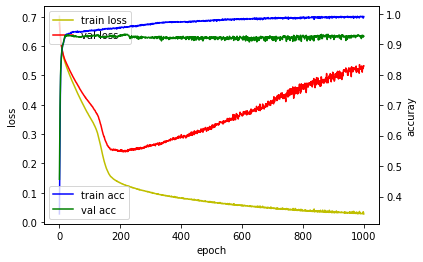





Activation: relu   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 32 , 8 , 4 ]  BatchSize: 512   Dropout: 0.1
처리 중인 폴드 # 0
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_209 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_157 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_210 (Dense)            (None, 8)                 264       
_________________________________________________________________
dropout_158 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_211 (Dense)            (None, 4)                 36        
_________________________________________________________________
dropout_159 (Dropout)        (None, 4)                 0         
_____

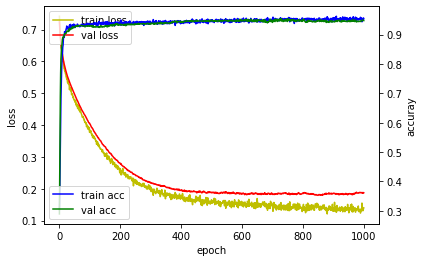





처리 중인 폴드 # 1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_213 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_160 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_214 (Dense)            (None, 8)                 264       
_________________________________________________________________
dropout_161 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_215 (Dense)            (None, 4)                 36        
_________________________________________________________________
dropout_162 (Dropout)        (None, 4)                 0         
_________________________________________________________________
dense_216 (Dense)            (None, 2)                 10  

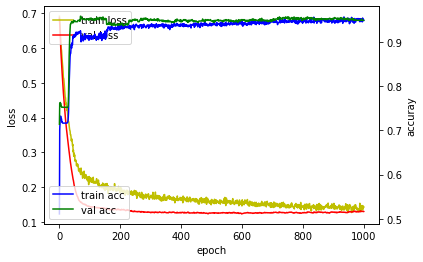





처리 중인 폴드 # 2
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_217 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_163 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_218 (Dense)            (None, 8)                 264       
_________________________________________________________________
dropout_164 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_219 (Dense)            (None, 4)                 36        
_________________________________________________________________
dropout_165 (Dropout)        (None, 4)                 0         
_________________________________________________________________
dense_220 (Dense)            (None, 2)                 10  

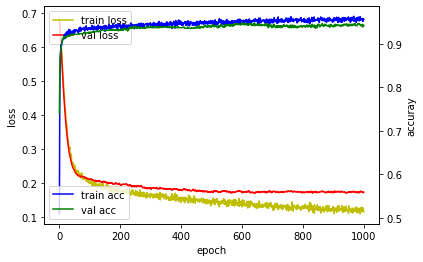





처리 중인 폴드 # 3
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_221 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_166 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_222 (Dense)            (None, 8)                 264       
_________________________________________________________________
dropout_167 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_223 (Dense)            (None, 4)                 36        
_________________________________________________________________
dropout_168 (Dropout)        (None, 4)                 0         
_________________________________________________________________
dense_224 (Dense)            (None, 2)                 10  

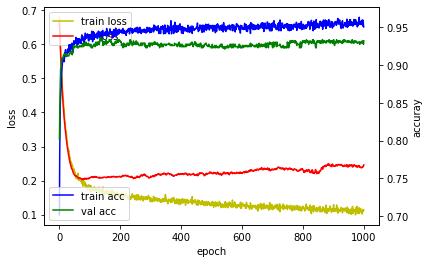





Activation: relu   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 32 , 8 , 8 ]  BatchSize: 512   Dropout: 0
처리 중인 폴드 # 0
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_225 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_169 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_226 (Dense)            (None, 8)                 264       
_________________________________________________________________
dropout_170 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_227 (Dense)            (None, 8)                 72        
_________________________________________________________________
dropout_171 (Dropout)        (None, 8)                 0         
_______

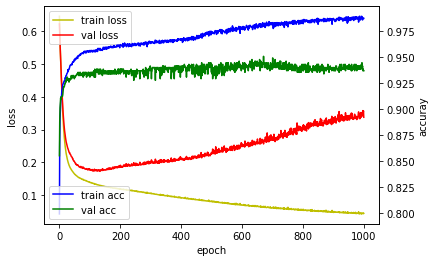





처리 중인 폴드 # 1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_229 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_172 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_230 (Dense)            (None, 8)                 264       
_________________________________________________________________
dropout_173 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_231 (Dense)            (None, 8)                 72        
_________________________________________________________________
dropout_174 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_232 (Dense)            (None, 2)                 18  

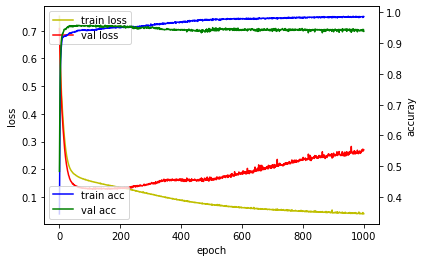





처리 중인 폴드 # 2
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_233 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_175 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_234 (Dense)            (None, 8)                 264       
_________________________________________________________________
dropout_176 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_235 (Dense)            (None, 8)                 72        
_________________________________________________________________
dropout_177 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_236 (Dense)            (None, 2)                 18  

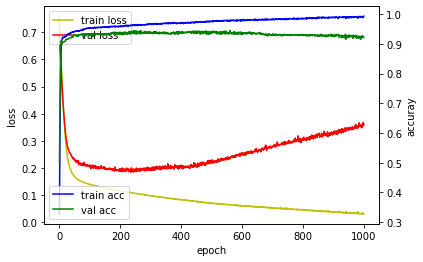





처리 중인 폴드 # 3
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_237 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_178 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_238 (Dense)            (None, 8)                 264       
_________________________________________________________________
dropout_179 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_239 (Dense)            (None, 8)                 72        
_________________________________________________________________
dropout_180 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_240 (Dense)            (None, 2)                 18  

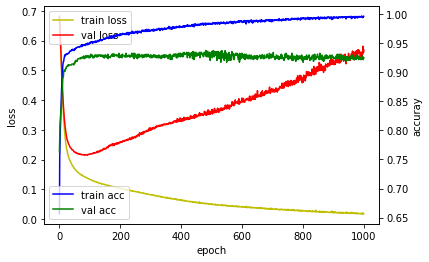





Activation: relu   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 32 , 8 , 8 ]  BatchSize: 512   Dropout: 0.1
처리 중인 폴드 # 0
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_241 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_181 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_242 (Dense)            (None, 8)                 264       
_________________________________________________________________
dropout_182 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_243 (Dense)            (None, 8)                 72        
_________________________________________________________________
dropout_183 (Dropout)        (None, 8)                 0         
_____

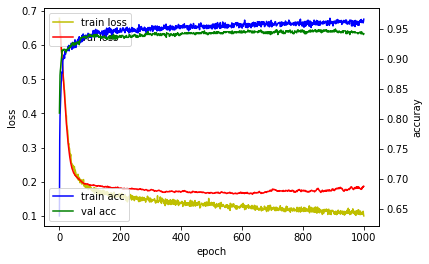





처리 중인 폴드 # 1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_245 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_184 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_246 (Dense)            (None, 8)                 264       
_________________________________________________________________
dropout_185 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_247 (Dense)            (None, 8)                 72        
_________________________________________________________________
dropout_186 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_248 (Dense)            (None, 2)                 18  

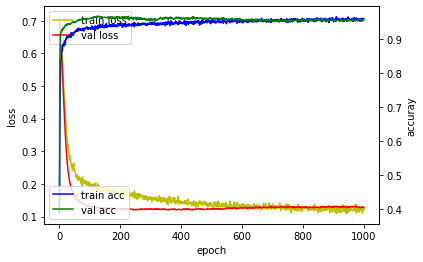





처리 중인 폴드 # 2
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_249 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_187 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_250 (Dense)            (None, 8)                 264       
_________________________________________________________________
dropout_188 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_251 (Dense)            (None, 8)                 72        
_________________________________________________________________
dropout_189 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_252 (Dense)            (None, 2)                 18  

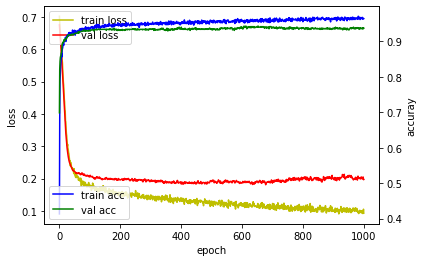





처리 중인 폴드 # 3
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_253 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_190 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_254 (Dense)            (None, 8)                 264       
_________________________________________________________________
dropout_191 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_255 (Dense)            (None, 8)                 72        
_________________________________________________________________
dropout_192 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_256 (Dense)            (None, 2)                 18  

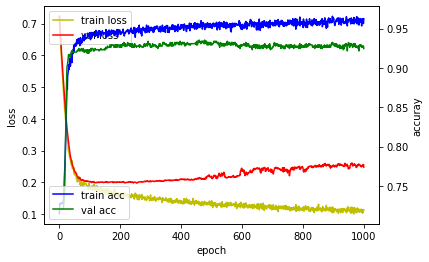





Activation: relu   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 32 , 8 , 16 ]  BatchSize: 512   Dropout: 0
처리 중인 폴드 # 0
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_257 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_193 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_258 (Dense)            (None, 8)                 264       
_________________________________________________________________
dropout_194 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_259 (Dense)            (None, 16)                144       
_________________________________________________________________
dropout_195 (Dropout)        (None, 16)                0         
______

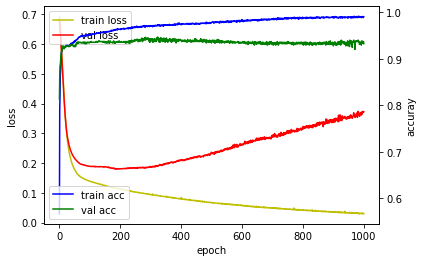





처리 중인 폴드 # 1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_261 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_196 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_262 (Dense)            (None, 8)                 264       
_________________________________________________________________
dropout_197 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_263 (Dense)            (None, 16)                144       
_________________________________________________________________
dropout_198 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_264 (Dense)            (None, 2)                 34  

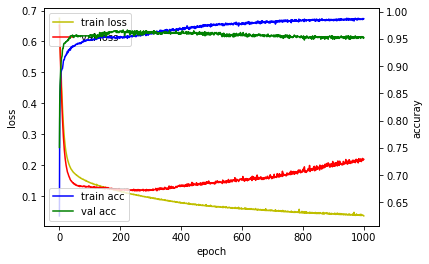





처리 중인 폴드 # 2
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_265 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_199 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_266 (Dense)            (None, 8)                 264       
_________________________________________________________________
dropout_200 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_267 (Dense)            (None, 16)                144       
_________________________________________________________________
dropout_201 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_268 (Dense)            (None, 2)                 34  

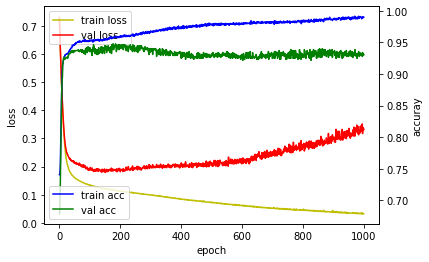





처리 중인 폴드 # 3
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_269 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_202 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_270 (Dense)            (None, 8)                 264       
_________________________________________________________________
dropout_203 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_271 (Dense)            (None, 16)                144       
_________________________________________________________________
dropout_204 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_272 (Dense)            (None, 2)                 34  

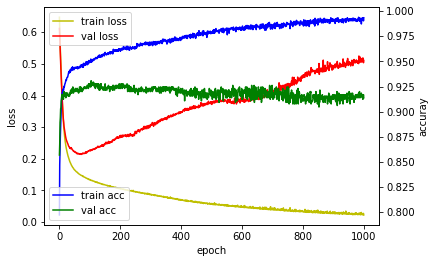





Activation: relu   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 32 , 8 , 16 ]  BatchSize: 512   Dropout: 0.1
처리 중인 폴드 # 0
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_273 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_205 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_274 (Dense)            (None, 8)                 264       
_________________________________________________________________
dropout_206 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_275 (Dense)            (None, 16)                144       
_________________________________________________________________
dropout_207 (Dropout)        (None, 16)                0         
____

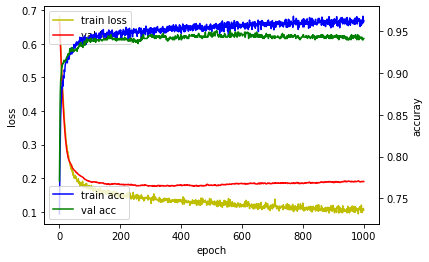





처리 중인 폴드 # 1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_277 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_208 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_278 (Dense)            (None, 8)                 264       
_________________________________________________________________
dropout_209 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_279 (Dense)            (None, 16)                144       
_________________________________________________________________
dropout_210 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_280 (Dense)            (None, 2)                 34  

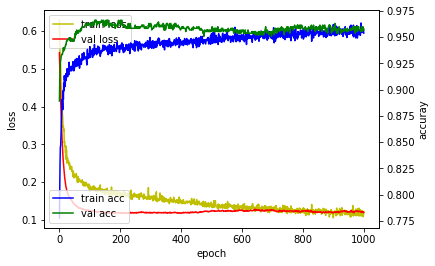





처리 중인 폴드 # 2
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_281 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_211 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_282 (Dense)            (None, 8)                 264       
_________________________________________________________________
dropout_212 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_283 (Dense)            (None, 16)                144       
_________________________________________________________________
dropout_213 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_284 (Dense)            (None, 2)                 34  

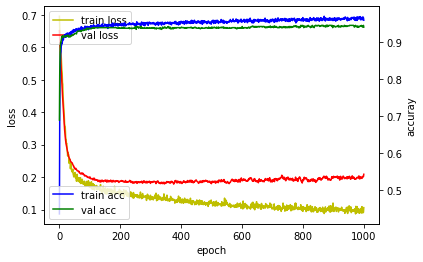





처리 중인 폴드 # 3
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_285 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_214 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_286 (Dense)            (None, 8)                 264       
_________________________________________________________________
dropout_215 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_287 (Dense)            (None, 16)                144       
_________________________________________________________________
dropout_216 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_288 (Dense)            (None, 2)                 34  

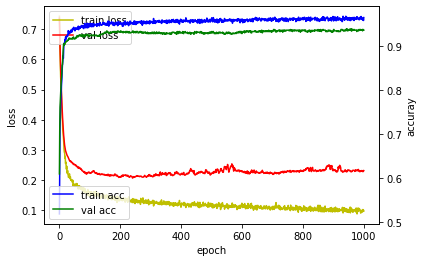





Activation: relu   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 32 , 16 , 4 ]  BatchSize: 512   Dropout: 0
처리 중인 폴드 # 0
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_289 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_217 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_290 (Dense)            (None, 16)                528       
_________________________________________________________________
dropout_218 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_291 (Dense)            (None, 4)                 68        
_________________________________________________________________
dropout_219 (Dropout)        (None, 4)                 0         
______

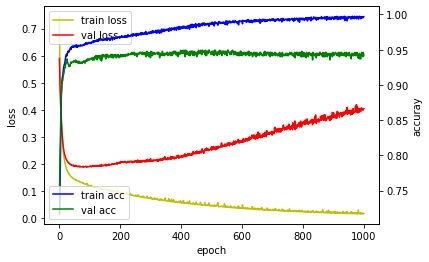





처리 중인 폴드 # 1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_293 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_220 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_294 (Dense)            (None, 16)                528       
_________________________________________________________________
dropout_221 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_295 (Dense)            (None, 4)                 68        
_________________________________________________________________
dropout_222 (Dropout)        (None, 4)                 0         
_________________________________________________________________
dense_296 (Dense)            (None, 2)                 10  

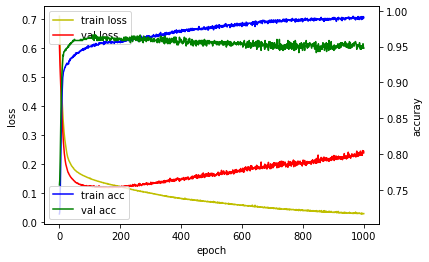





처리 중인 폴드 # 2
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_297 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_223 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_298 (Dense)            (None, 16)                528       
_________________________________________________________________
dropout_224 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_299 (Dense)            (None, 4)                 68        
_________________________________________________________________
dropout_225 (Dropout)        (None, 4)                 0         
_________________________________________________________________
dense_300 (Dense)            (None, 2)                 10  

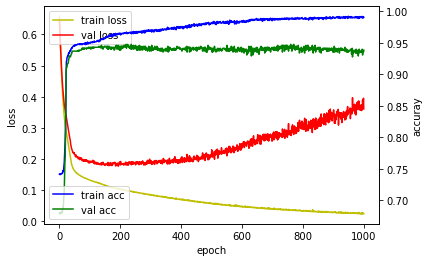





처리 중인 폴드 # 3
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_301 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_226 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_302 (Dense)            (None, 16)                528       
_________________________________________________________________
dropout_227 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_303 (Dense)            (None, 4)                 68        
_________________________________________________________________
dropout_228 (Dropout)        (None, 4)                 0         
_________________________________________________________________
dense_304 (Dense)            (None, 2)                 10  

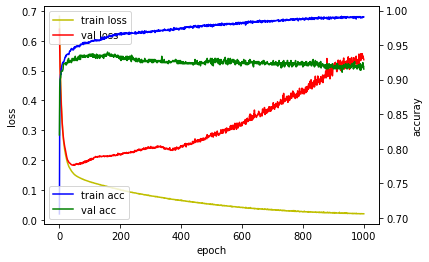





Activation: relu   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 32 , 16 , 4 ]  BatchSize: 512   Dropout: 0.1
처리 중인 폴드 # 0
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_305 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_229 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_306 (Dense)            (None, 16)                528       
_________________________________________________________________
dropout_230 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_307 (Dense)            (None, 4)                 68        
_________________________________________________________________
dropout_231 (Dropout)        (None, 4)                 0         
____

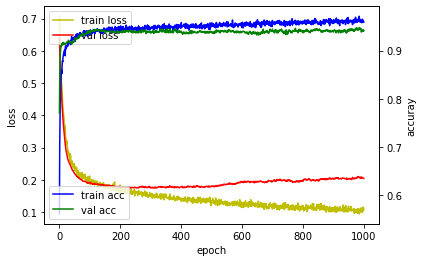





처리 중인 폴드 # 1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_309 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_232 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_310 (Dense)            (None, 16)                528       
_________________________________________________________________
dropout_233 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_311 (Dense)            (None, 4)                 68        
_________________________________________________________________
dropout_234 (Dropout)        (None, 4)                 0         
_________________________________________________________________
dense_312 (Dense)            (None, 2)                 10  

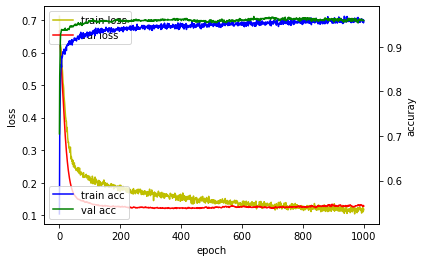





처리 중인 폴드 # 2
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_313 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_235 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_314 (Dense)            (None, 16)                528       
_________________________________________________________________
dropout_236 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_315 (Dense)            (None, 4)                 68        
_________________________________________________________________
dropout_237 (Dropout)        (None, 4)                 0         
_________________________________________________________________
dense_316 (Dense)            (None, 2)                 10  

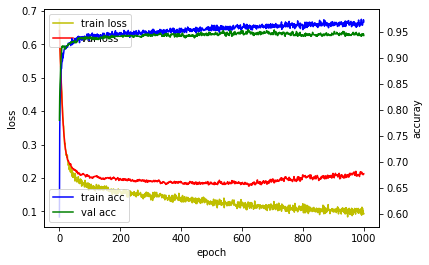





처리 중인 폴드 # 3
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_317 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_238 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_318 (Dense)            (None, 16)                528       
_________________________________________________________________
dropout_239 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_319 (Dense)            (None, 4)                 68        
_________________________________________________________________
dropout_240 (Dropout)        (None, 4)                 0         
_________________________________________________________________
dense_320 (Dense)            (None, 2)                 10  

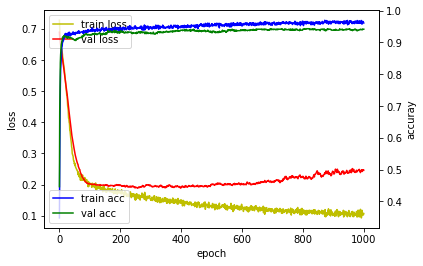





Activation: relu   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 32 , 16 , 8 ]  BatchSize: 512   Dropout: 0
처리 중인 폴드 # 0
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_321 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_241 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_322 (Dense)            (None, 16)                528       
_________________________________________________________________
dropout_242 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_323 (Dense)            (None, 8)                 136       
_________________________________________________________________
dropout_243 (Dropout)        (None, 8)                 0         
______

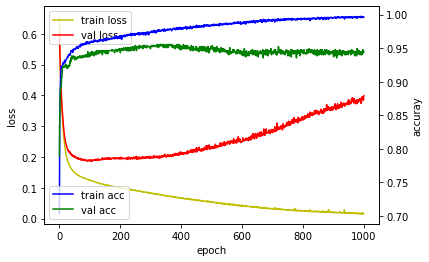





처리 중인 폴드 # 1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_325 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_244 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_326 (Dense)            (None, 16)                528       
_________________________________________________________________
dropout_245 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_327 (Dense)            (None, 8)                 136       
_________________________________________________________________
dropout_246 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_328 (Dense)            (None, 2)                 18  

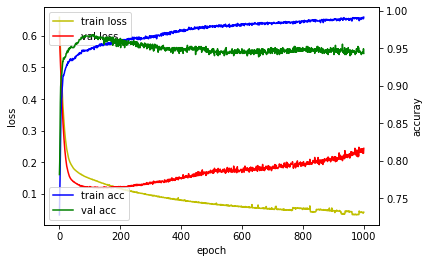





처리 중인 폴드 # 2
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_329 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_247 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_330 (Dense)            (None, 16)                528       
_________________________________________________________________
dropout_248 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_331 (Dense)            (None, 8)                 136       
_________________________________________________________________
dropout_249 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_332 (Dense)            (None, 2)                 18  

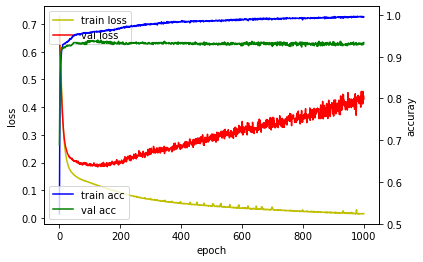





처리 중인 폴드 # 3
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_333 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_250 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_334 (Dense)            (None, 16)                528       
_________________________________________________________________
dropout_251 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_335 (Dense)            (None, 8)                 136       
_________________________________________________________________
dropout_252 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_336 (Dense)            (None, 2)                 18  

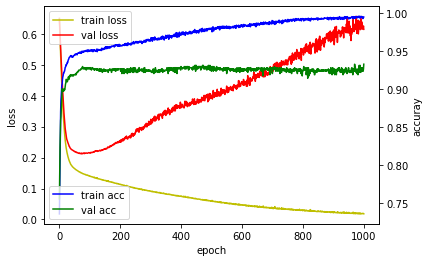





Activation: relu   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 32 , 16 , 8 ]  BatchSize: 512   Dropout: 0.1
처리 중인 폴드 # 0
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_337 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_253 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_338 (Dense)            (None, 16)                528       
_________________________________________________________________
dropout_254 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_339 (Dense)            (None, 8)                 136       
_________________________________________________________________
dropout_255 (Dropout)        (None, 8)                 0         
____

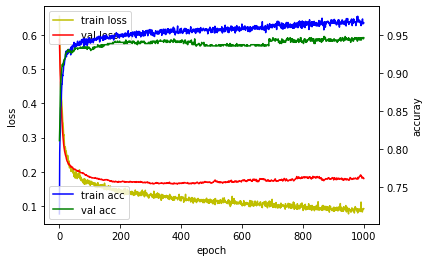





처리 중인 폴드 # 1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_341 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_256 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_342 (Dense)            (None, 16)                528       
_________________________________________________________________
dropout_257 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_343 (Dense)            (None, 8)                 136       
_________________________________________________________________
dropout_258 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_344 (Dense)            (None, 2)                 18  

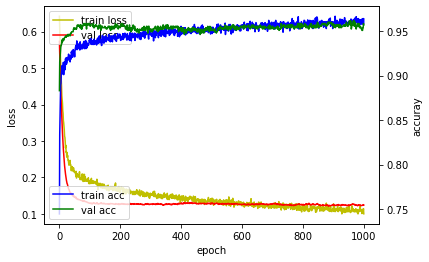





처리 중인 폴드 # 2
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_345 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_259 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_346 (Dense)            (None, 16)                528       
_________________________________________________________________
dropout_260 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_347 (Dense)            (None, 8)                 136       
_________________________________________________________________
dropout_261 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_348 (Dense)            (None, 2)                 18  

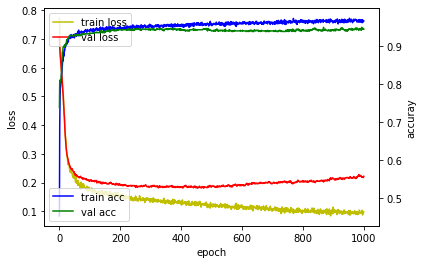





처리 중인 폴드 # 3
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_349 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_262 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_350 (Dense)            (None, 16)                528       
_________________________________________________________________
dropout_263 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_351 (Dense)            (None, 8)                 136       
_________________________________________________________________
dropout_264 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_352 (Dense)            (None, 2)                 18  

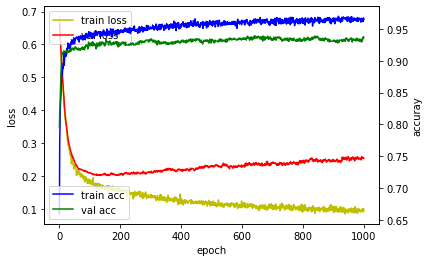





Activation: relu   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 32 , 16 , 16 ]  BatchSize: 512   Dropout: 0
처리 중인 폴드 # 0
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_353 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_265 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_354 (Dense)            (None, 16)                528       
_________________________________________________________________
dropout_266 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_355 (Dense)            (None, 16)                272       
_________________________________________________________________
dropout_267 (Dropout)        (None, 16)                0         
_____

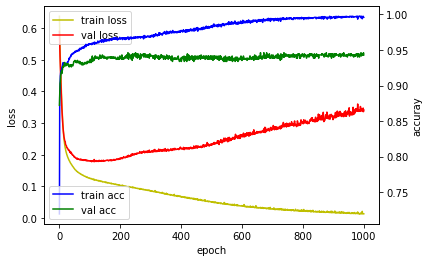





처리 중인 폴드 # 1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_357 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_268 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_358 (Dense)            (None, 16)                528       
_________________________________________________________________
dropout_269 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_359 (Dense)            (None, 16)                272       
_________________________________________________________________
dropout_270 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_360 (Dense)            (None, 2)                 34  

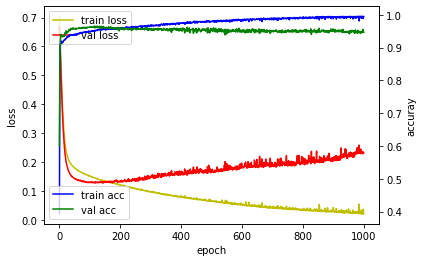





처리 중인 폴드 # 2
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_361 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_271 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_362 (Dense)            (None, 16)                528       
_________________________________________________________________
dropout_272 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_363 (Dense)            (None, 16)                272       
_________________________________________________________________
dropout_273 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_364 (Dense)            (None, 2)                 34  

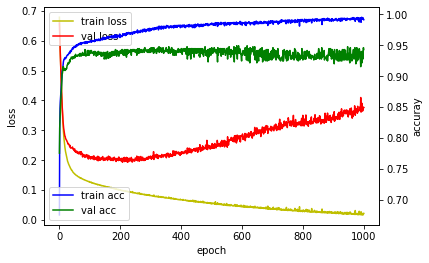





처리 중인 폴드 # 3
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_365 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_274 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_366 (Dense)            (None, 16)                528       
_________________________________________________________________
dropout_275 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_367 (Dense)            (None, 16)                272       
_________________________________________________________________
dropout_276 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_368 (Dense)            (None, 2)                 34  

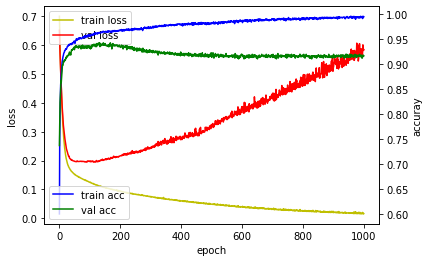





Activation: relu   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 32 , 16 , 16 ]  BatchSize: 512   Dropout: 0.1
처리 중인 폴드 # 0
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_369 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_277 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_370 (Dense)            (None, 16)                528       
_________________________________________________________________
dropout_278 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_371 (Dense)            (None, 16)                272       
_________________________________________________________________
dropout_279 (Dropout)        (None, 16)                0         
___

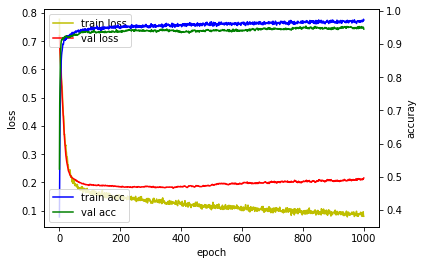





처리 중인 폴드 # 1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_373 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_280 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_374 (Dense)            (None, 16)                528       
_________________________________________________________________
dropout_281 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_375 (Dense)            (None, 16)                272       
_________________________________________________________________
dropout_282 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_376 (Dense)            (None, 2)                 34  

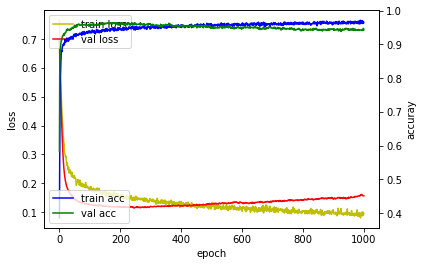





처리 중인 폴드 # 2
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_377 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_283 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_378 (Dense)            (None, 16)                528       
_________________________________________________________________
dropout_284 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_379 (Dense)            (None, 16)                272       
_________________________________________________________________
dropout_285 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_380 (Dense)            (None, 2)                 34  

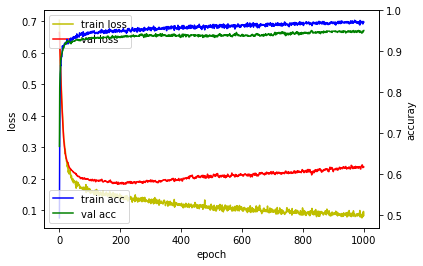





처리 중인 폴드 # 3
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_381 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_286 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_382 (Dense)            (None, 16)                528       
_________________________________________________________________
dropout_287 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_383 (Dense)            (None, 16)                272       
_________________________________________________________________
dropout_288 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_384 (Dense)            (None, 2)                 34  

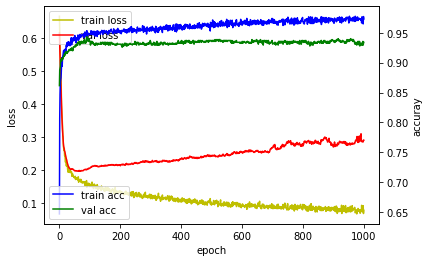





Activation: relu   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 32 , 32 , 4 ]  BatchSize: 512   Dropout: 0
처리 중인 폴드 # 0
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_385 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_289 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_386 (Dense)            (None, 32)                1056      
_________________________________________________________________
dropout_290 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_387 (Dense)            (None, 4)                 132       
_________________________________________________________________
dropout_291 (Dropout)        (None, 4)                 0         
______

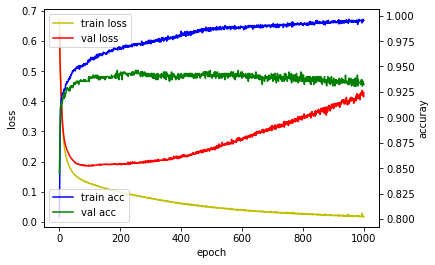





처리 중인 폴드 # 1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_389 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_292 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_390 (Dense)            (None, 32)                1056      
_________________________________________________________________
dropout_293 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_391 (Dense)            (None, 4)                 132       
_________________________________________________________________
dropout_294 (Dropout)        (None, 4)                 0         
_________________________________________________________________
dense_392 (Dense)            (None, 2)                 10  

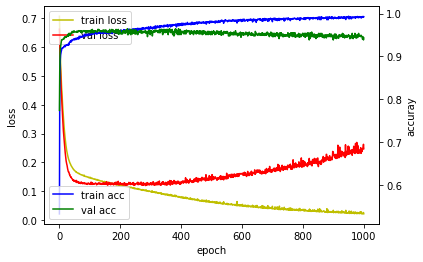





처리 중인 폴드 # 2
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_393 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_295 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_394 (Dense)            (None, 32)                1056      
_________________________________________________________________
dropout_296 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_395 (Dense)            (None, 4)                 132       
_________________________________________________________________
dropout_297 (Dropout)        (None, 4)                 0         
_________________________________________________________________
dense_396 (Dense)            (None, 2)                 10  

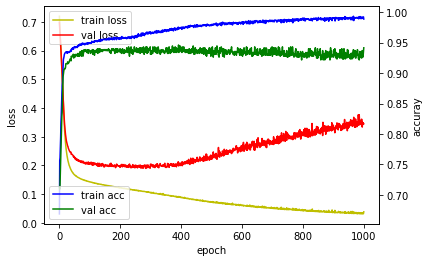





처리 중인 폴드 # 3
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_397 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_298 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_398 (Dense)            (None, 32)                1056      
_________________________________________________________________
dropout_299 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_399 (Dense)            (None, 4)                 132       
_________________________________________________________________
dropout_300 (Dropout)        (None, 4)                 0         
_________________________________________________________________
dense_400 (Dense)            (None, 2)                 10  

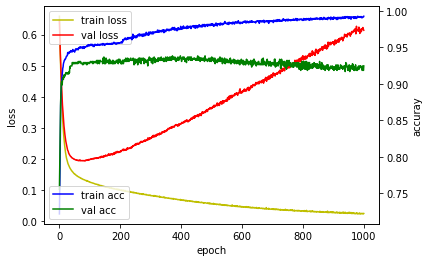





Activation: relu   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 32 , 32 , 4 ]  BatchSize: 512   Dropout: 0.1
처리 중인 폴드 # 0
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_401 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_301 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_402 (Dense)            (None, 32)                1056      
_________________________________________________________________
dropout_302 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_403 (Dense)            (None, 4)                 132       
_________________________________________________________________
dropout_303 (Dropout)        (None, 4)                 0         
____

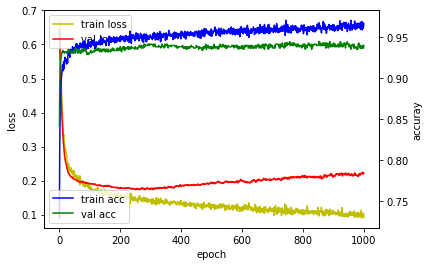





처리 중인 폴드 # 1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_405 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_304 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_406 (Dense)            (None, 32)                1056      
_________________________________________________________________
dropout_305 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_407 (Dense)            (None, 4)                 132       
_________________________________________________________________
dropout_306 (Dropout)        (None, 4)                 0         
_________________________________________________________________
dense_408 (Dense)            (None, 2)                 10  

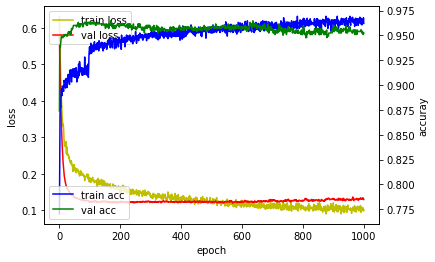





처리 중인 폴드 # 2
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_409 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_307 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_410 (Dense)            (None, 32)                1056      
_________________________________________________________________
dropout_308 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_411 (Dense)            (None, 4)                 132       
_________________________________________________________________
dropout_309 (Dropout)        (None, 4)                 0         
_________________________________________________________________
dense_412 (Dense)            (None, 2)                 10  

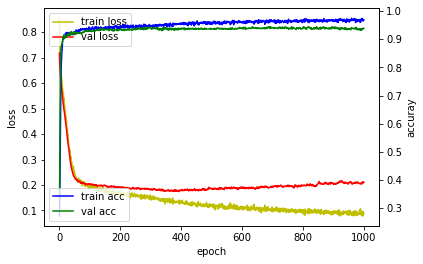





처리 중인 폴드 # 3
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_413 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_310 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_414 (Dense)            (None, 32)                1056      
_________________________________________________________________
dropout_311 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_415 (Dense)            (None, 4)                 132       
_________________________________________________________________
dropout_312 (Dropout)        (None, 4)                 0         
_________________________________________________________________
dense_416 (Dense)            (None, 2)                 10  

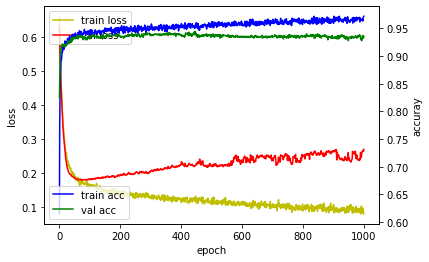





Activation: relu   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 32 , 32 , 8 ]  BatchSize: 512   Dropout: 0
처리 중인 폴드 # 0
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_417 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_313 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_418 (Dense)            (None, 32)                1056      
_________________________________________________________________
dropout_314 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_419 (Dense)            (None, 8)                 264       
_________________________________________________________________
dropout_315 (Dropout)        (None, 8)                 0         
______

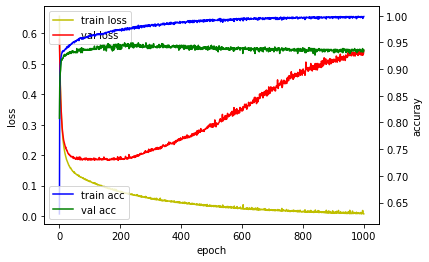





처리 중인 폴드 # 1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_421 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_316 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_422 (Dense)            (None, 32)                1056      
_________________________________________________________________
dropout_317 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_423 (Dense)            (None, 8)                 264       
_________________________________________________________________
dropout_318 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_424 (Dense)            (None, 2)                 18  

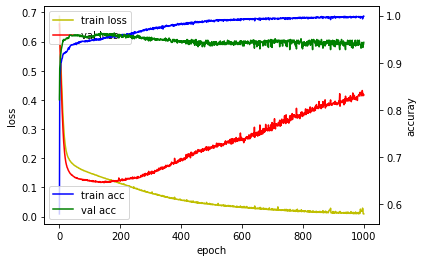





처리 중인 폴드 # 2
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_425 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_319 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_426 (Dense)            (None, 32)                1056      
_________________________________________________________________
dropout_320 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_427 (Dense)            (None, 8)                 264       
_________________________________________________________________
dropout_321 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_428 (Dense)            (None, 2)                 18  

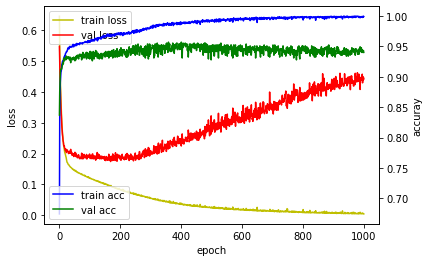





처리 중인 폴드 # 3
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_429 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_322 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_430 (Dense)            (None, 32)                1056      
_________________________________________________________________
dropout_323 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_431 (Dense)            (None, 8)                 264       
_________________________________________________________________
dropout_324 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_432 (Dense)            (None, 2)                 18  

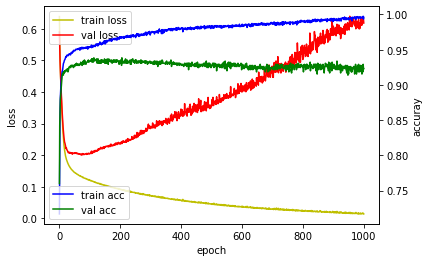





Activation: relu   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 32 , 32 , 8 ]  BatchSize: 512   Dropout: 0.1
처리 중인 폴드 # 0
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_433 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_325 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_434 (Dense)            (None, 32)                1056      
_________________________________________________________________
dropout_326 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_435 (Dense)            (None, 8)                 264       
_________________________________________________________________
dropout_327 (Dropout)        (None, 8)                 0         
____

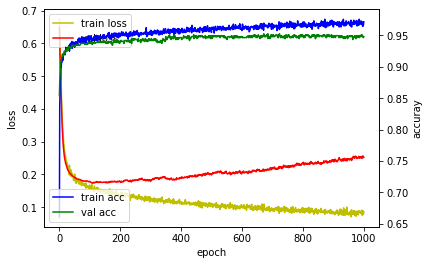





처리 중인 폴드 # 1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_437 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_328 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_438 (Dense)            (None, 32)                1056      
_________________________________________________________________
dropout_329 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_439 (Dense)            (None, 8)                 264       
_________________________________________________________________
dropout_330 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_440 (Dense)            (None, 2)                 18  

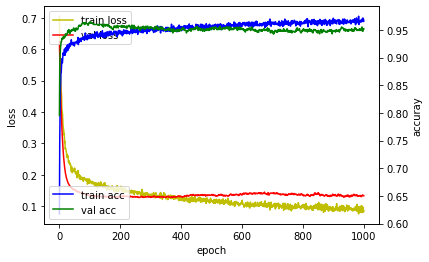





처리 중인 폴드 # 2
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_441 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_331 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_442 (Dense)            (None, 32)                1056      
_________________________________________________________________
dropout_332 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_443 (Dense)            (None, 8)                 264       
_________________________________________________________________
dropout_333 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_444 (Dense)            (None, 2)                 18  

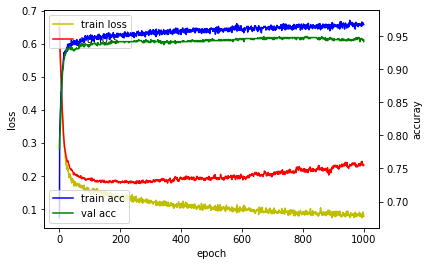





처리 중인 폴드 # 3
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_445 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_334 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_446 (Dense)            (None, 32)                1056      
_________________________________________________________________
dropout_335 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_447 (Dense)            (None, 8)                 264       
_________________________________________________________________
dropout_336 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_448 (Dense)            (None, 2)                 18  

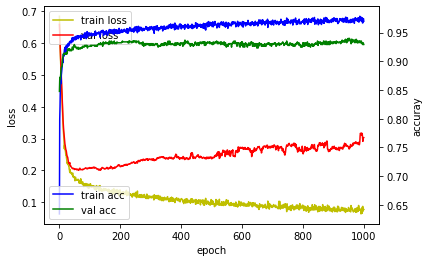





Activation: relu   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 32 , 32 , 16 ]  BatchSize: 512   Dropout: 0
처리 중인 폴드 # 0
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_449 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_337 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_450 (Dense)            (None, 32)                1056      
_________________________________________________________________
dropout_338 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_451 (Dense)            (None, 16)                528       
_________________________________________________________________
dropout_339 (Dropout)        (None, 16)                0         
_____

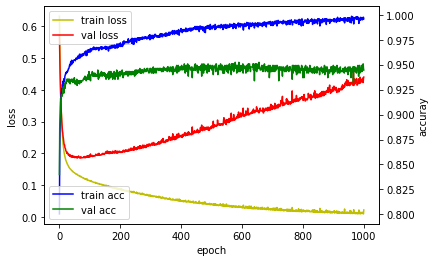





처리 중인 폴드 # 1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_453 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_340 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_454 (Dense)            (None, 32)                1056      
_________________________________________________________________
dropout_341 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_455 (Dense)            (None, 16)                528       
_________________________________________________________________
dropout_342 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_456 (Dense)            (None, 2)                 34  

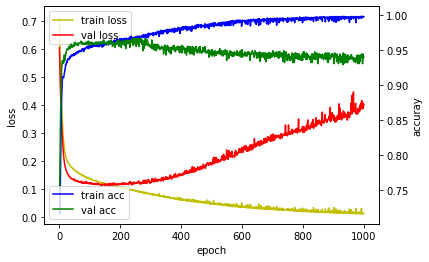





처리 중인 폴드 # 2
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_457 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_343 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_458 (Dense)            (None, 32)                1056      
_________________________________________________________________
dropout_344 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_459 (Dense)            (None, 16)                528       
_________________________________________________________________
dropout_345 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_460 (Dense)            (None, 2)                 34  

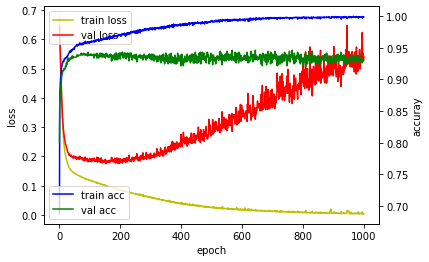





처리 중인 폴드 # 3
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_461 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_346 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_462 (Dense)            (None, 32)                1056      
_________________________________________________________________
dropout_347 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_463 (Dense)            (None, 16)                528       
_________________________________________________________________
dropout_348 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_464 (Dense)            (None, 2)                 34  

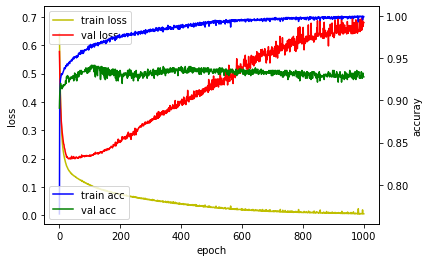





Activation: relu   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 32 , 32 , 16 ]  BatchSize: 512   Dropout: 0.1
처리 중인 폴드 # 0
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_465 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_349 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_466 (Dense)            (None, 32)                1056      
_________________________________________________________________
dropout_350 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_467 (Dense)            (None, 16)                528       
_________________________________________________________________
dropout_351 (Dropout)        (None, 16)                0         
___

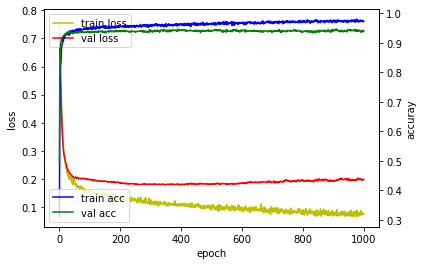





처리 중인 폴드 # 1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_469 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_352 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_470 (Dense)            (None, 32)                1056      
_________________________________________________________________
dropout_353 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_471 (Dense)            (None, 16)                528       
_________________________________________________________________
dropout_354 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_472 (Dense)            (None, 2)                 34  

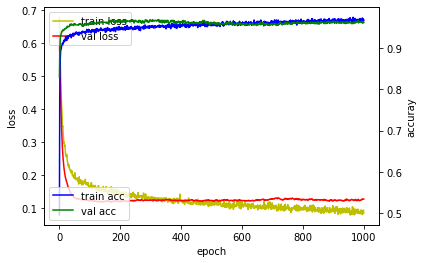





처리 중인 폴드 # 2
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_473 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_355 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_474 (Dense)            (None, 32)                1056      
_________________________________________________________________
dropout_356 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_475 (Dense)            (None, 16)                528       
_________________________________________________________________
dropout_357 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_476 (Dense)            (None, 2)                 34  

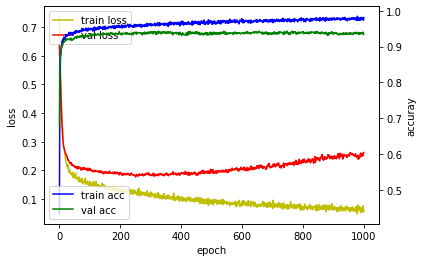





처리 중인 폴드 # 3
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_477 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_358 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_478 (Dense)            (None, 32)                1056      
_________________________________________________________________
dropout_359 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_479 (Dense)            (None, 16)                528       
_________________________________________________________________
dropout_360 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_480 (Dense)            (None, 2)                 34  

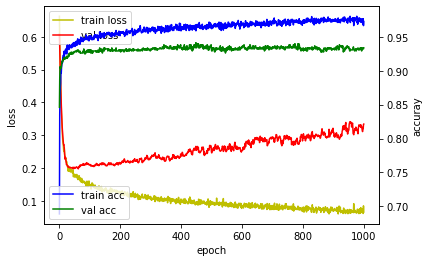





Activation: relu   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 32 , 32 , 32 ]  BatchSize: 512   Dropout: 0
처리 중인 폴드 # 0
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_481 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_361 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_482 (Dense)            (None, 32)                1056      
_________________________________________________________________
dropout_362 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_483 (Dense)            (None, 32)                1056      
_________________________________________________________________
dropout_363 (Dropout)        (None, 32)                0         
_____

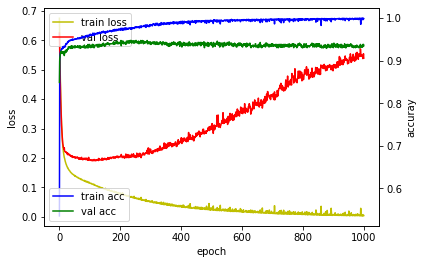





처리 중인 폴드 # 1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_485 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_364 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_486 (Dense)            (None, 32)                1056      
_________________________________________________________________
dropout_365 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_487 (Dense)            (None, 32)                1056      
_________________________________________________________________
dropout_366 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_488 (Dense)            (None, 2)                 66  

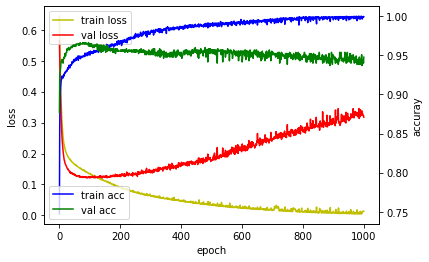





처리 중인 폴드 # 2
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_489 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_367 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_490 (Dense)            (None, 32)                1056      
_________________________________________________________________
dropout_368 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_491 (Dense)            (None, 32)                1056      
_________________________________________________________________
dropout_369 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_492 (Dense)            (None, 2)                 66  

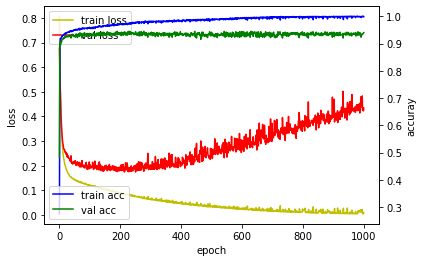





처리 중인 폴드 # 3
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_493 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_370 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_494 (Dense)            (None, 32)                1056      
_________________________________________________________________
dropout_371 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_495 (Dense)            (None, 32)                1056      
_________________________________________________________________
dropout_372 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_496 (Dense)            (None, 2)                 66  

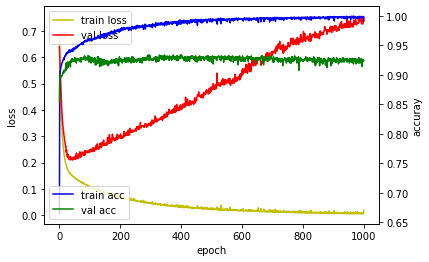





Activation: relu   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 32 , 32 , 32 ]  BatchSize: 512   Dropout: 0.1
처리 중인 폴드 # 0
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_497 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_373 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_498 (Dense)            (None, 32)                1056      
_________________________________________________________________
dropout_374 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_499 (Dense)            (None, 32)                1056      
_________________________________________________________________
dropout_375 (Dropout)        (None, 32)                0         
___

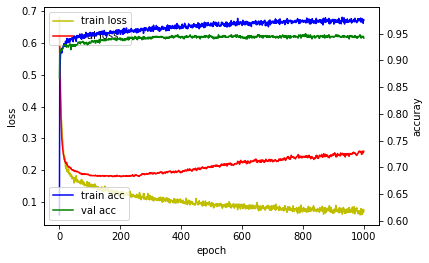





처리 중인 폴드 # 1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_501 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_376 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_502 (Dense)            (None, 32)                1056      
_________________________________________________________________
dropout_377 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_503 (Dense)            (None, 32)                1056      
_________________________________________________________________
dropout_378 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_504 (Dense)            (None, 2)                 66  

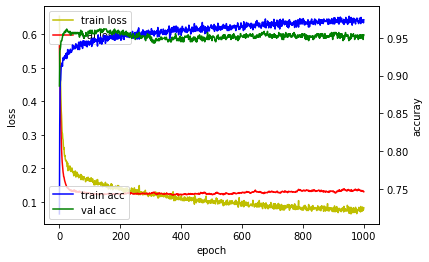





처리 중인 폴드 # 2
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_505 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_379 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_506 (Dense)            (None, 32)                1056      
_________________________________________________________________
dropout_380 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_507 (Dense)            (None, 32)                1056      
_________________________________________________________________
dropout_381 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_508 (Dense)            (None, 2)                 66  

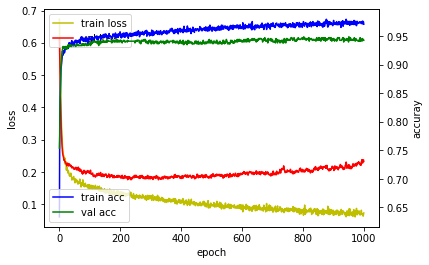





처리 중인 폴드 # 3
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_509 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_382 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_510 (Dense)            (None, 32)                1056      
_________________________________________________________________
dropout_383 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_511 (Dense)            (None, 32)                1056      
_________________________________________________________________
dropout_384 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_512 (Dense)            (None, 2)                 66  

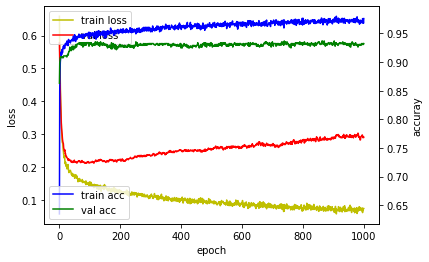





Activation: sigmoid   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 16 , 8 , 4 ]  BatchSize: 512   Dropout: 0
처리 중인 폴드 # 0
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_513 (Dense)            (None, 16)                176       
_________________________________________________________________
dropout_385 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_514 (Dense)            (None, 8)                 136       
_________________________________________________________________
dropout_386 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_515 (Dense)            (None, 4)                 36        
_________________________________________________________________
dropout_387 (Dropout)        (None, 4)                 0         
____

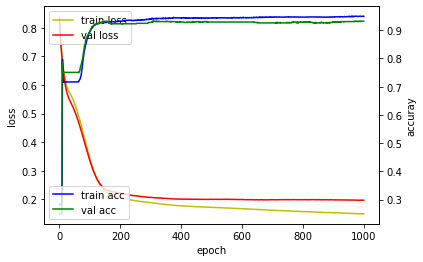





처리 중인 폴드 # 1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_517 (Dense)            (None, 16)                176       
_________________________________________________________________
dropout_388 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_518 (Dense)            (None, 8)                 136       
_________________________________________________________________
dropout_389 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_519 (Dense)            (None, 4)                 36        
_________________________________________________________________
dropout_390 (Dropout)        (None, 4)                 0         
_________________________________________________________________
dense_520 (Dense)            (None, 2)                 10  

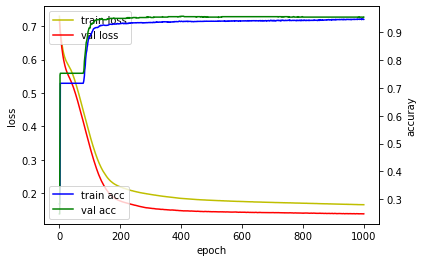





처리 중인 폴드 # 2
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_521 (Dense)            (None, 16)                176       
_________________________________________________________________
dropout_391 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_522 (Dense)            (None, 8)                 136       
_________________________________________________________________
dropout_392 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_523 (Dense)            (None, 4)                 36        
_________________________________________________________________
dropout_393 (Dropout)        (None, 4)                 0         
_________________________________________________________________
dense_524 (Dense)            (None, 2)                 10  

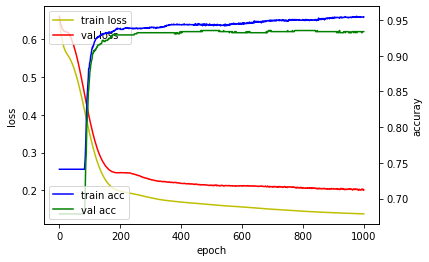





처리 중인 폴드 # 3
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_525 (Dense)            (None, 16)                176       
_________________________________________________________________
dropout_394 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_526 (Dense)            (None, 8)                 136       
_________________________________________________________________
dropout_395 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_527 (Dense)            (None, 4)                 36        
_________________________________________________________________
dropout_396 (Dropout)        (None, 4)                 0         
_________________________________________________________________
dense_528 (Dense)            (None, 2)                 10  

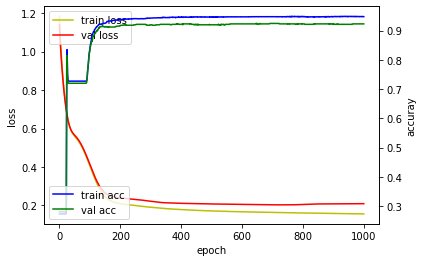





Activation: sigmoid   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 16 , 8 , 4 ]  BatchSize: 512   Dropout: 0.1
처리 중인 폴드 # 0
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_529 (Dense)            (None, 16)                176       
_________________________________________________________________
dropout_397 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_530 (Dense)            (None, 8)                 136       
_________________________________________________________________
dropout_398 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_531 (Dense)            (None, 4)                 36        
_________________________________________________________________
dropout_399 (Dropout)        (None, 4)                 0         
__

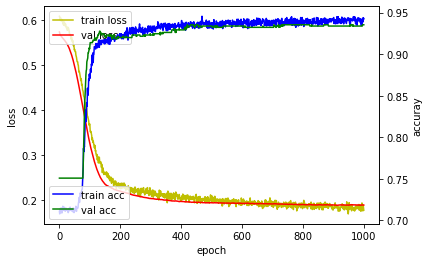





처리 중인 폴드 # 1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_533 (Dense)            (None, 16)                176       
_________________________________________________________________
dropout_400 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_534 (Dense)            (None, 8)                 136       
_________________________________________________________________
dropout_401 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_535 (Dense)            (None, 4)                 36        
_________________________________________________________________
dropout_402 (Dropout)        (None, 4)                 0         
_________________________________________________________________
dense_536 (Dense)            (None, 2)                 10  

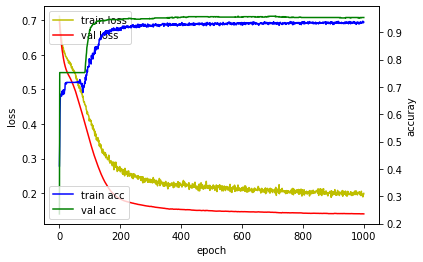





처리 중인 폴드 # 2
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_537 (Dense)            (None, 16)                176       
_________________________________________________________________
dropout_403 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_538 (Dense)            (None, 8)                 136       
_________________________________________________________________
dropout_404 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_539 (Dense)            (None, 4)                 36        
_________________________________________________________________
dropout_405 (Dropout)        (None, 4)                 0         
_________________________________________________________________
dense_540 (Dense)            (None, 2)                 10  

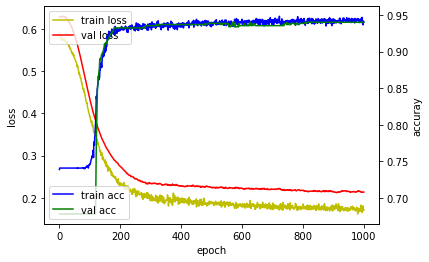





처리 중인 폴드 # 3
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_541 (Dense)            (None, 16)                176       
_________________________________________________________________
dropout_406 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_542 (Dense)            (None, 8)                 136       
_________________________________________________________________
dropout_407 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_543 (Dense)            (None, 4)                 36        
_________________________________________________________________
dropout_408 (Dropout)        (None, 4)                 0         
_________________________________________________________________
dense_544 (Dense)            (None, 2)                 10  

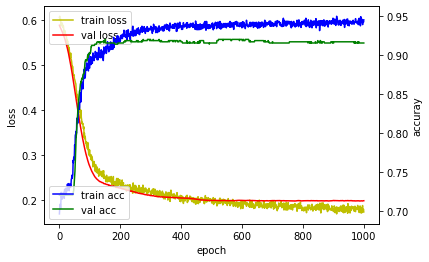





Activation: sigmoid   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 16 , 8 , 8 ]  BatchSize: 512   Dropout: 0
처리 중인 폴드 # 0
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_545 (Dense)            (None, 16)                176       
_________________________________________________________________
dropout_409 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_546 (Dense)            (None, 8)                 136       
_________________________________________________________________
dropout_410 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_547 (Dense)            (None, 8)                 72        
_________________________________________________________________
dropout_411 (Dropout)        (None, 8)                 0         
____

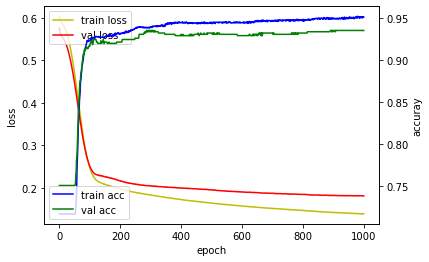





처리 중인 폴드 # 1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_549 (Dense)            (None, 16)                176       
_________________________________________________________________
dropout_412 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_550 (Dense)            (None, 8)                 136       
_________________________________________________________________
dropout_413 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_551 (Dense)            (None, 8)                 72        
_________________________________________________________________
dropout_414 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_552 (Dense)            (None, 2)                 18  

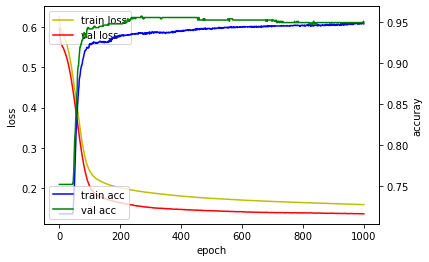





처리 중인 폴드 # 2
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_553 (Dense)            (None, 16)                176       
_________________________________________________________________
dropout_415 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_554 (Dense)            (None, 8)                 136       
_________________________________________________________________
dropout_416 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_555 (Dense)            (None, 8)                 72        
_________________________________________________________________
dropout_417 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_556 (Dense)            (None, 2)                 18  

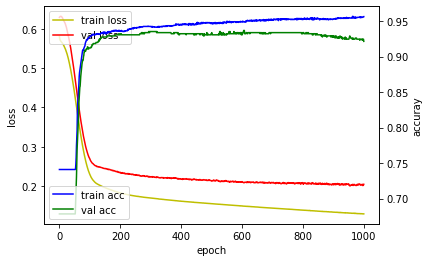





처리 중인 폴드 # 3
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_557 (Dense)            (None, 16)                176       
_________________________________________________________________
dropout_418 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_558 (Dense)            (None, 8)                 136       
_________________________________________________________________
dropout_419 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_559 (Dense)            (None, 8)                 72        
_________________________________________________________________
dropout_420 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_560 (Dense)            (None, 2)                 18  

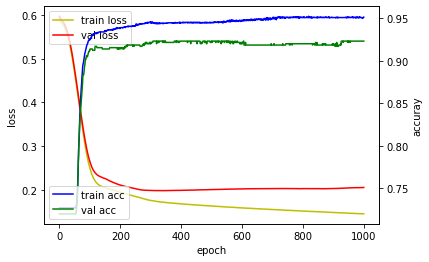





Activation: sigmoid   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 16 , 8 , 8 ]  BatchSize: 512   Dropout: 0.1
처리 중인 폴드 # 0
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_561 (Dense)            (None, 16)                176       
_________________________________________________________________
dropout_421 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_562 (Dense)            (None, 8)                 136       
_________________________________________________________________
dropout_422 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_563 (Dense)            (None, 8)                 72        
_________________________________________________________________
dropout_423 (Dropout)        (None, 8)                 0         
__

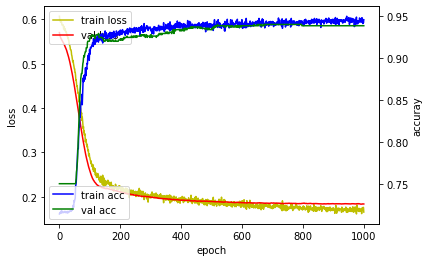





처리 중인 폴드 # 1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_565 (Dense)            (None, 16)                176       
_________________________________________________________________
dropout_424 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_566 (Dense)            (None, 8)                 136       
_________________________________________________________________
dropout_425 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_567 (Dense)            (None, 8)                 72        
_________________________________________________________________
dropout_426 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_568 (Dense)            (None, 2)                 18  

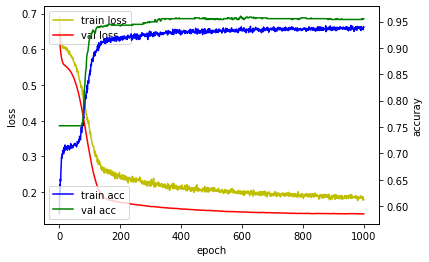





처리 중인 폴드 # 2
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_569 (Dense)            (None, 16)                176       
_________________________________________________________________
dropout_427 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_570 (Dense)            (None, 8)                 136       
_________________________________________________________________
dropout_428 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_571 (Dense)            (None, 8)                 72        
_________________________________________________________________
dropout_429 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_572 (Dense)            (None, 2)                 18  

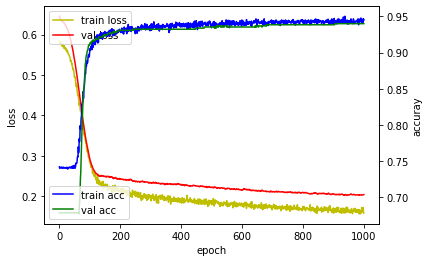





처리 중인 폴드 # 3
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_573 (Dense)            (None, 16)                176       
_________________________________________________________________
dropout_430 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_574 (Dense)            (None, 8)                 136       
_________________________________________________________________
dropout_431 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_575 (Dense)            (None, 8)                 72        
_________________________________________________________________
dropout_432 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_576 (Dense)            (None, 2)                 18  

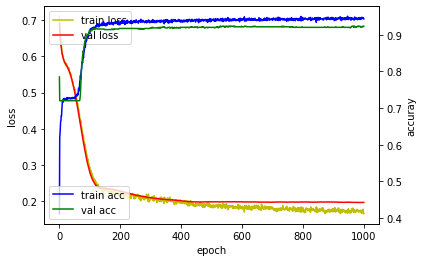





Activation: sigmoid   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 16 , 8 , 16 ]  BatchSize: 512   Dropout: 0
처리 중인 폴드 # 0
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_577 (Dense)            (None, 16)                176       
_________________________________________________________________
dropout_433 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_578 (Dense)            (None, 8)                 136       
_________________________________________________________________
dropout_434 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_579 (Dense)            (None, 16)                144       
_________________________________________________________________
dropout_435 (Dropout)        (None, 16)                0         
___

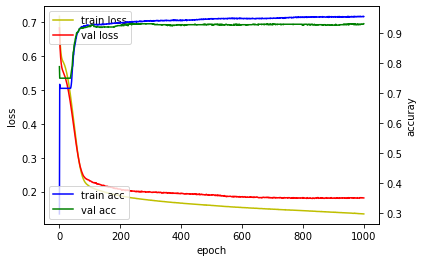





처리 중인 폴드 # 1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_581 (Dense)            (None, 16)                176       
_________________________________________________________________
dropout_436 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_582 (Dense)            (None, 8)                 136       
_________________________________________________________________
dropout_437 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_583 (Dense)            (None, 16)                144       
_________________________________________________________________
dropout_438 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_584 (Dense)            (None, 2)                 34  

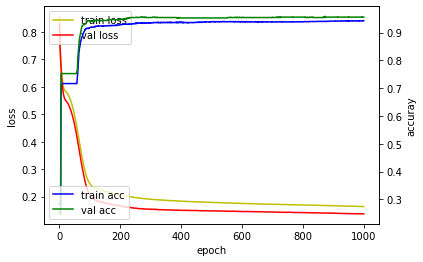





처리 중인 폴드 # 2
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_585 (Dense)            (None, 16)                176       
_________________________________________________________________
dropout_439 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_586 (Dense)            (None, 8)                 136       
_________________________________________________________________
dropout_440 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_587 (Dense)            (None, 16)                144       
_________________________________________________________________
dropout_441 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_588 (Dense)            (None, 2)                 34  

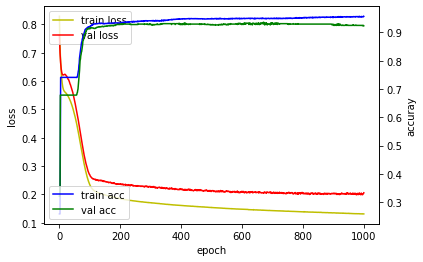





처리 중인 폴드 # 3
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_589 (Dense)            (None, 16)                176       
_________________________________________________________________
dropout_442 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_590 (Dense)            (None, 8)                 136       
_________________________________________________________________
dropout_443 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_591 (Dense)            (None, 16)                144       
_________________________________________________________________
dropout_444 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_592 (Dense)            (None, 2)                 34  

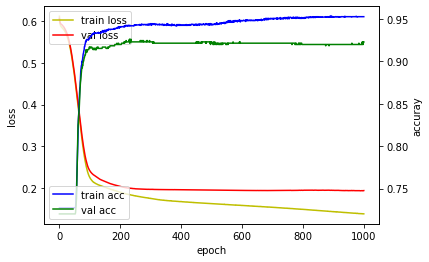





Activation: sigmoid   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 16 , 8 , 16 ]  BatchSize: 512   Dropout: 0.1
처리 중인 폴드 # 0
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_593 (Dense)            (None, 16)                176       
_________________________________________________________________
dropout_445 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_594 (Dense)            (None, 8)                 136       
_________________________________________________________________
dropout_446 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_595 (Dense)            (None, 16)                144       
_________________________________________________________________
dropout_447 (Dropout)        (None, 16)                0         
_

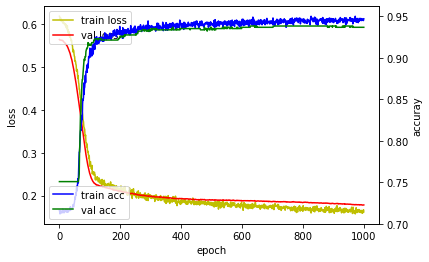





처리 중인 폴드 # 1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_597 (Dense)            (None, 16)                176       
_________________________________________________________________
dropout_448 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_598 (Dense)            (None, 8)                 136       
_________________________________________________________________
dropout_449 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_599 (Dense)            (None, 16)                144       
_________________________________________________________________
dropout_450 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_600 (Dense)            (None, 2)                 34  

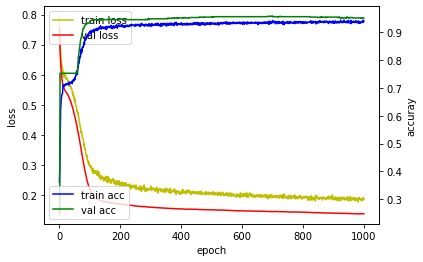





처리 중인 폴드 # 2
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_601 (Dense)            (None, 16)                176       
_________________________________________________________________
dropout_451 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_602 (Dense)            (None, 8)                 136       
_________________________________________________________________
dropout_452 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_603 (Dense)            (None, 16)                144       
_________________________________________________________________
dropout_453 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_604 (Dense)            (None, 2)                 34  

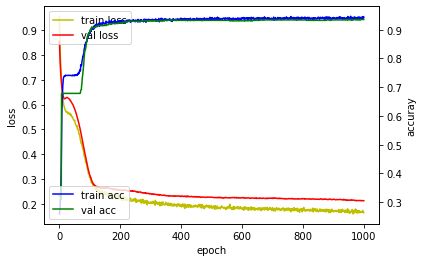





처리 중인 폴드 # 3
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_605 (Dense)            (None, 16)                176       
_________________________________________________________________
dropout_454 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_606 (Dense)            (None, 8)                 136       
_________________________________________________________________
dropout_455 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_607 (Dense)            (None, 16)                144       
_________________________________________________________________
dropout_456 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_608 (Dense)            (None, 2)                 34  

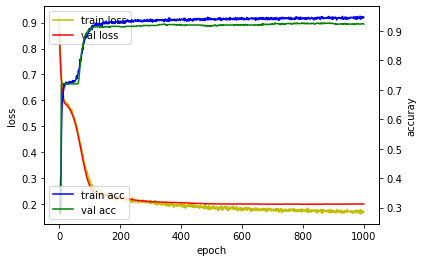





Activation: sigmoid   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 16 , 16 , 4 ]  BatchSize: 512   Dropout: 0
처리 중인 폴드 # 0
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_609 (Dense)            (None, 16)                176       
_________________________________________________________________
dropout_457 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_610 (Dense)            (None, 16)                272       
_________________________________________________________________
dropout_458 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_611 (Dense)            (None, 4)                 68        
_________________________________________________________________
dropout_459 (Dropout)        (None, 4)                 0         
___

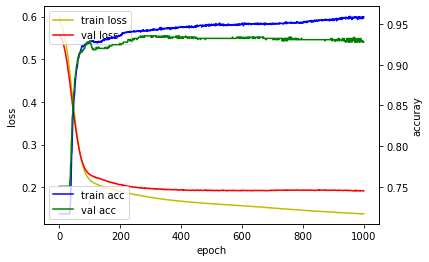





처리 중인 폴드 # 1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_613 (Dense)            (None, 16)                176       
_________________________________________________________________
dropout_460 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_614 (Dense)            (None, 16)                272       
_________________________________________________________________
dropout_461 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_615 (Dense)            (None, 4)                 68        
_________________________________________________________________
dropout_462 (Dropout)        (None, 4)                 0         
_________________________________________________________________
dense_616 (Dense)            (None, 2)                 10  

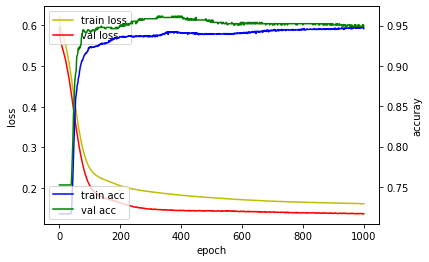





처리 중인 폴드 # 2
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_617 (Dense)            (None, 16)                176       
_________________________________________________________________
dropout_463 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_618 (Dense)            (None, 16)                272       
_________________________________________________________________
dropout_464 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_619 (Dense)            (None, 4)                 68        
_________________________________________________________________
dropout_465 (Dropout)        (None, 4)                 0         
_________________________________________________________________
dense_620 (Dense)            (None, 2)                 10  

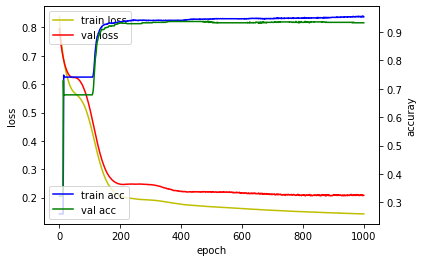





처리 중인 폴드 # 3
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_621 (Dense)            (None, 16)                176       
_________________________________________________________________
dropout_466 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_622 (Dense)            (None, 16)                272       
_________________________________________________________________
dropout_467 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_623 (Dense)            (None, 4)                 68        
_________________________________________________________________
dropout_468 (Dropout)        (None, 4)                 0         
_________________________________________________________________
dense_624 (Dense)            (None, 2)                 10  

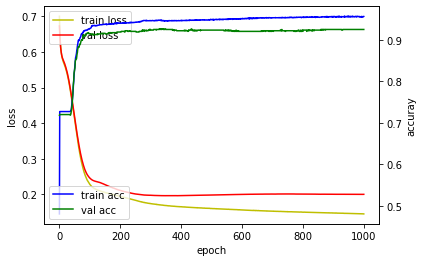





Activation: sigmoid   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 16 , 16 , 4 ]  BatchSize: 512   Dropout: 0.1
처리 중인 폴드 # 0
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_625 (Dense)            (None, 16)                176       
_________________________________________________________________
dropout_469 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_626 (Dense)            (None, 16)                272       
_________________________________________________________________
dropout_470 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_627 (Dense)            (None, 4)                 68        
_________________________________________________________________
dropout_471 (Dropout)        (None, 4)                 0         
_

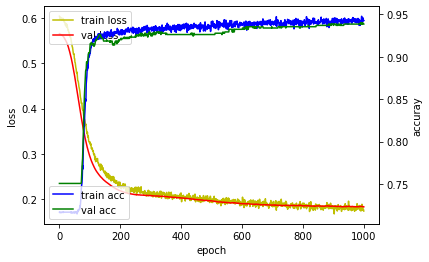





처리 중인 폴드 # 1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_629 (Dense)            (None, 16)                176       
_________________________________________________________________
dropout_472 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_630 (Dense)            (None, 16)                272       
_________________________________________________________________
dropout_473 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_631 (Dense)            (None, 4)                 68        
_________________________________________________________________
dropout_474 (Dropout)        (None, 4)                 0         
_________________________________________________________________
dense_632 (Dense)            (None, 2)                 10  

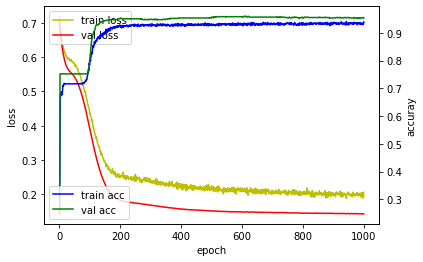





처리 중인 폴드 # 2
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_633 (Dense)            (None, 16)                176       
_________________________________________________________________
dropout_475 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_634 (Dense)            (None, 16)                272       
_________________________________________________________________
dropout_476 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_635 (Dense)            (None, 4)                 68        
_________________________________________________________________
dropout_477 (Dropout)        (None, 4)                 0         
_________________________________________________________________
dense_636 (Dense)            (None, 2)                 10  

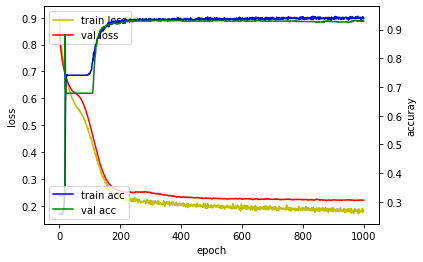





처리 중인 폴드 # 3
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_637 (Dense)            (None, 16)                176       
_________________________________________________________________
dropout_478 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_638 (Dense)            (None, 16)                272       
_________________________________________________________________
dropout_479 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_639 (Dense)            (None, 4)                 68        
_________________________________________________________________
dropout_480 (Dropout)        (None, 4)                 0         
_________________________________________________________________
dense_640 (Dense)            (None, 2)                 10  

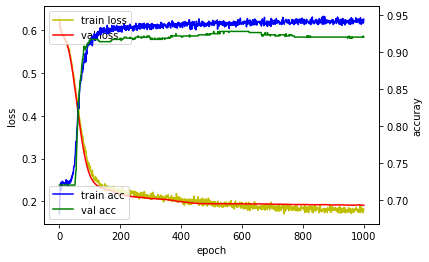





Activation: sigmoid   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 16 , 16 , 8 ]  BatchSize: 512   Dropout: 0
처리 중인 폴드 # 0
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_641 (Dense)            (None, 16)                176       
_________________________________________________________________
dropout_481 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_642 (Dense)            (None, 16)                272       
_________________________________________________________________
dropout_482 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_643 (Dense)            (None, 8)                 136       
_________________________________________________________________
dropout_483 (Dropout)        (None, 8)                 0         
___

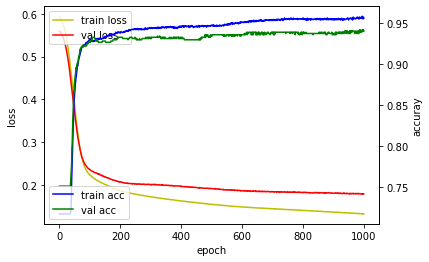





처리 중인 폴드 # 1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_645 (Dense)            (None, 16)                176       
_________________________________________________________________
dropout_484 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_646 (Dense)            (None, 16)                272       
_________________________________________________________________
dropout_485 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_647 (Dense)            (None, 8)                 136       
_________________________________________________________________
dropout_486 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_648 (Dense)            (None, 2)                 18  

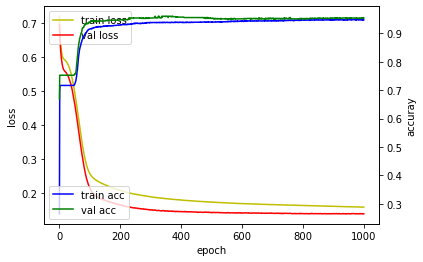





처리 중인 폴드 # 2
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_649 (Dense)            (None, 16)                176       
_________________________________________________________________
dropout_487 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_650 (Dense)            (None, 16)                272       
_________________________________________________________________
dropout_488 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_651 (Dense)            (None, 8)                 136       
_________________________________________________________________
dropout_489 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_652 (Dense)            (None, 2)                 18  

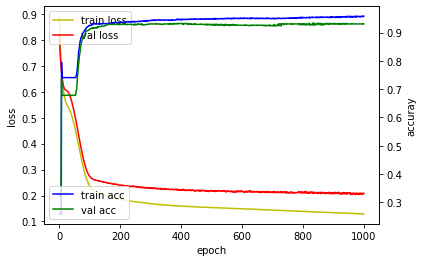





처리 중인 폴드 # 3
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_653 (Dense)            (None, 16)                176       
_________________________________________________________________
dropout_490 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_654 (Dense)            (None, 16)                272       
_________________________________________________________________
dropout_491 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_655 (Dense)            (None, 8)                 136       
_________________________________________________________________
dropout_492 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_656 (Dense)            (None, 2)                 18  

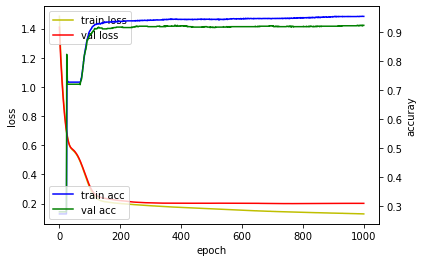





Activation: sigmoid   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 16 , 16 , 8 ]  BatchSize: 512   Dropout: 0.1
처리 중인 폴드 # 0
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_657 (Dense)            (None, 16)                176       
_________________________________________________________________
dropout_493 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_658 (Dense)            (None, 16)                272       
_________________________________________________________________
dropout_494 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_659 (Dense)            (None, 8)                 136       
_________________________________________________________________
dropout_495 (Dropout)        (None, 8)                 0         
_

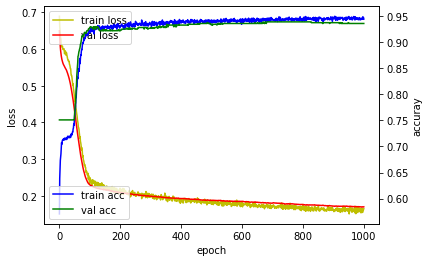





처리 중인 폴드 # 1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_661 (Dense)            (None, 16)                176       
_________________________________________________________________
dropout_496 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_662 (Dense)            (None, 16)                272       
_________________________________________________________________
dropout_497 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_663 (Dense)            (None, 8)                 136       
_________________________________________________________________
dropout_498 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_664 (Dense)            (None, 2)                 18  

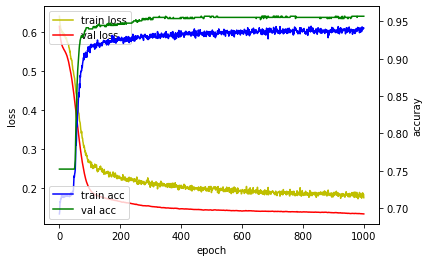





처리 중인 폴드 # 2
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_665 (Dense)            (None, 16)                176       
_________________________________________________________________
dropout_499 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_666 (Dense)            (None, 16)                272       
_________________________________________________________________
dropout_500 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_667 (Dense)            (None, 8)                 136       
_________________________________________________________________
dropout_501 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_668 (Dense)            (None, 2)                 18  

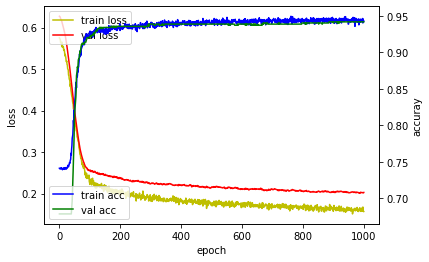





처리 중인 폴드 # 3
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_669 (Dense)            (None, 16)                176       
_________________________________________________________________
dropout_502 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_670 (Dense)            (None, 16)                272       
_________________________________________________________________
dropout_503 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_671 (Dense)            (None, 8)                 136       
_________________________________________________________________
dropout_504 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_672 (Dense)            (None, 2)                 18  

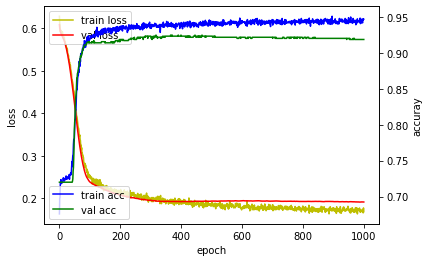





Activation: sigmoid   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 16 , 16 , 16 ]  BatchSize: 512   Dropout: 0
처리 중인 폴드 # 0
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_673 (Dense)            (None, 16)                176       
_________________________________________________________________
dropout_505 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_674 (Dense)            (None, 16)                272       
_________________________________________________________________
dropout_506 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_675 (Dense)            (None, 16)                272       
_________________________________________________________________
dropout_507 (Dropout)        (None, 16)                0         
__

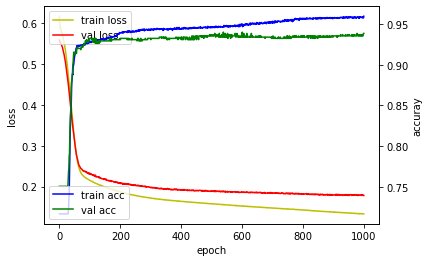





처리 중인 폴드 # 1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_677 (Dense)            (None, 16)                176       
_________________________________________________________________
dropout_508 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_678 (Dense)            (None, 16)                272       
_________________________________________________________________
dropout_509 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_679 (Dense)            (None, 16)                272       
_________________________________________________________________
dropout_510 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_680 (Dense)            (None, 2)                 34  

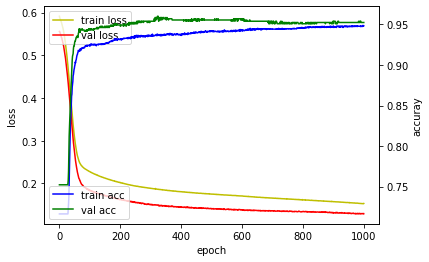





처리 중인 폴드 # 2
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_681 (Dense)            (None, 16)                176       
_________________________________________________________________
dropout_511 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_682 (Dense)            (None, 16)                272       
_________________________________________________________________
dropout_512 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_683 (Dense)            (None, 16)                272       
_________________________________________________________________
dropout_513 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_684 (Dense)            (None, 2)                 34  

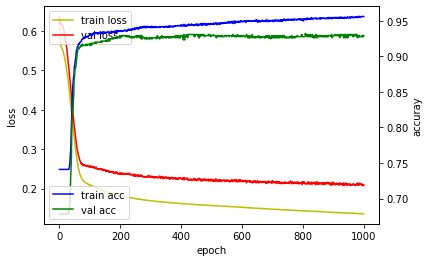





처리 중인 폴드 # 3
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_685 (Dense)            (None, 16)                176       
_________________________________________________________________
dropout_514 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_686 (Dense)            (None, 16)                272       
_________________________________________________________________
dropout_515 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_687 (Dense)            (None, 16)                272       
_________________________________________________________________
dropout_516 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_688 (Dense)            (None, 2)                 34  

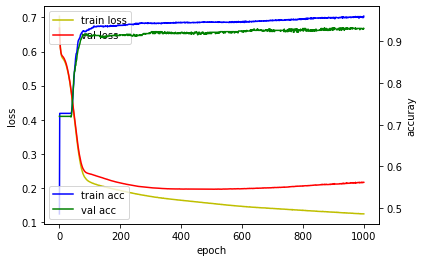





Activation: sigmoid   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 16 , 16 , 16 ]  BatchSize: 512   Dropout: 0.1
처리 중인 폴드 # 0
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_689 (Dense)            (None, 16)                176       
_________________________________________________________________
dropout_517 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_690 (Dense)            (None, 16)                272       
_________________________________________________________________
dropout_518 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_691 (Dense)            (None, 16)                272       
_________________________________________________________________
dropout_519 (Dropout)        (None, 16)                0         


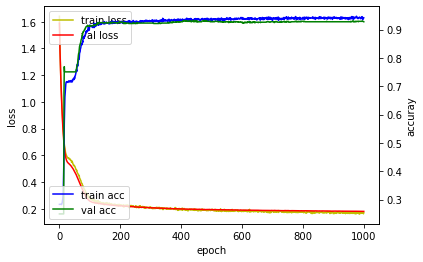





처리 중인 폴드 # 1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_693 (Dense)            (None, 16)                176       
_________________________________________________________________
dropout_520 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_694 (Dense)            (None, 16)                272       
_________________________________________________________________
dropout_521 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_695 (Dense)            (None, 16)                272       
_________________________________________________________________
dropout_522 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_696 (Dense)            (None, 2)                 34  

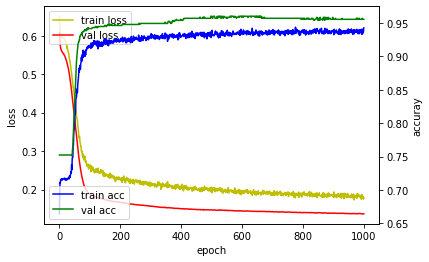





처리 중인 폴드 # 2
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_697 (Dense)            (None, 16)                176       
_________________________________________________________________
dropout_523 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_698 (Dense)            (None, 16)                272       
_________________________________________________________________
dropout_524 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_699 (Dense)            (None, 16)                272       
_________________________________________________________________
dropout_525 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_700 (Dense)            (None, 2)                 34  

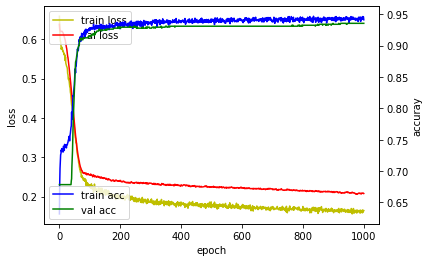





처리 중인 폴드 # 3
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_701 (Dense)            (None, 16)                176       
_________________________________________________________________
dropout_526 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_702 (Dense)            (None, 16)                272       
_________________________________________________________________
dropout_527 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_703 (Dense)            (None, 16)                272       
_________________________________________________________________
dropout_528 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_704 (Dense)            (None, 2)                 34  

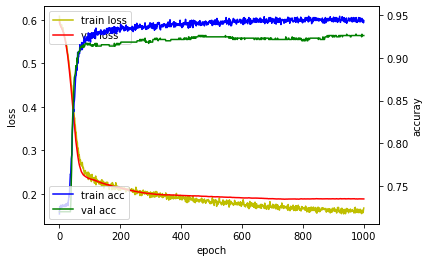





Activation: sigmoid   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 32 , 8 , 4 ]  BatchSize: 512   Dropout: 0
처리 중인 폴드 # 0
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_705 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_529 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_706 (Dense)            (None, 8)                 264       
_________________________________________________________________
dropout_530 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_707 (Dense)            (None, 4)                 36        
_________________________________________________________________
dropout_531 (Dropout)        (None, 4)                 0         
____

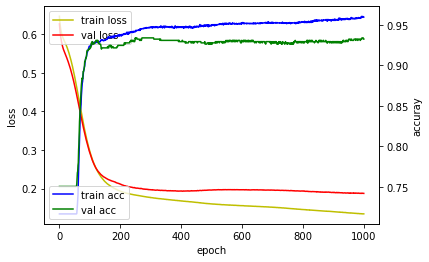





처리 중인 폴드 # 1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_709 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_532 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_710 (Dense)            (None, 8)                 264       
_________________________________________________________________
dropout_533 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_711 (Dense)            (None, 4)                 36        
_________________________________________________________________
dropout_534 (Dropout)        (None, 4)                 0         
_________________________________________________________________
dense_712 (Dense)            (None, 2)                 10  

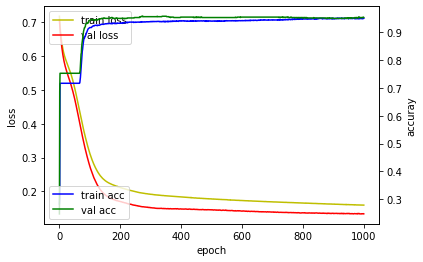





처리 중인 폴드 # 2
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_713 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_535 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_714 (Dense)            (None, 8)                 264       
_________________________________________________________________
dropout_536 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_715 (Dense)            (None, 4)                 36        
_________________________________________________________________
dropout_537 (Dropout)        (None, 4)                 0         
_________________________________________________________________
dense_716 (Dense)            (None, 2)                 10  

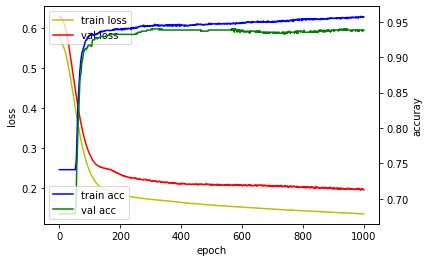





처리 중인 폴드 # 3
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_717 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_538 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_718 (Dense)            (None, 8)                 264       
_________________________________________________________________
dropout_539 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_719 (Dense)            (None, 4)                 36        
_________________________________________________________________
dropout_540 (Dropout)        (None, 4)                 0         
_________________________________________________________________
dense_720 (Dense)            (None, 2)                 10  

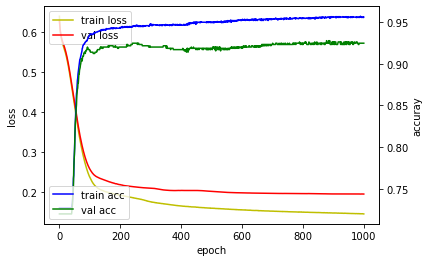





Activation: sigmoid   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 32 , 8 , 4 ]  BatchSize: 512   Dropout: 0.1
처리 중인 폴드 # 0
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_721 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_541 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_722 (Dense)            (None, 8)                 264       
_________________________________________________________________
dropout_542 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_723 (Dense)            (None, 4)                 36        
_________________________________________________________________
dropout_543 (Dropout)        (None, 4)                 0         
__

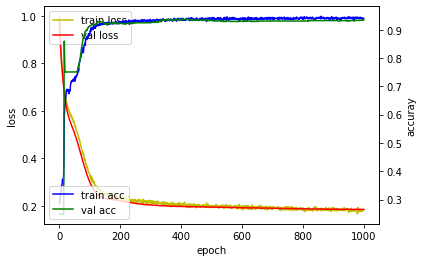





처리 중인 폴드 # 1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_725 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_544 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_726 (Dense)            (None, 8)                 264       
_________________________________________________________________
dropout_545 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_727 (Dense)            (None, 4)                 36        
_________________________________________________________________
dropout_546 (Dropout)        (None, 4)                 0         
_________________________________________________________________
dense_728 (Dense)            (None, 2)                 10  

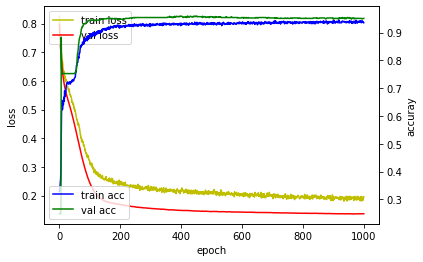





처리 중인 폴드 # 2
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_729 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_547 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_730 (Dense)            (None, 8)                 264       
_________________________________________________________________
dropout_548 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_731 (Dense)            (None, 4)                 36        
_________________________________________________________________
dropout_549 (Dropout)        (None, 4)                 0         
_________________________________________________________________
dense_732 (Dense)            (None, 2)                 10  

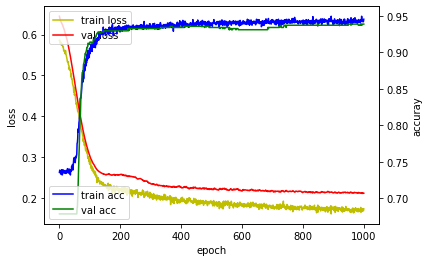





처리 중인 폴드 # 3
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_733 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_550 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_734 (Dense)            (None, 8)                 264       
_________________________________________________________________
dropout_551 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_735 (Dense)            (None, 4)                 36        
_________________________________________________________________
dropout_552 (Dropout)        (None, 4)                 0         
_________________________________________________________________
dense_736 (Dense)            (None, 2)                 10  

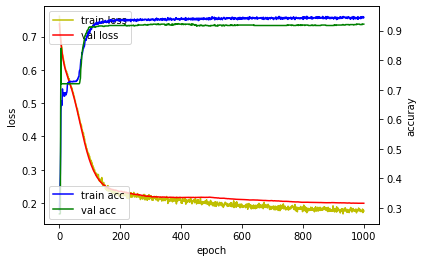





Activation: sigmoid   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 32 , 8 , 8 ]  BatchSize: 512   Dropout: 0
처리 중인 폴드 # 0
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_737 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_553 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_738 (Dense)            (None, 8)                 264       
_________________________________________________________________
dropout_554 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_739 (Dense)            (None, 8)                 72        
_________________________________________________________________
dropout_555 (Dropout)        (None, 8)                 0         
____

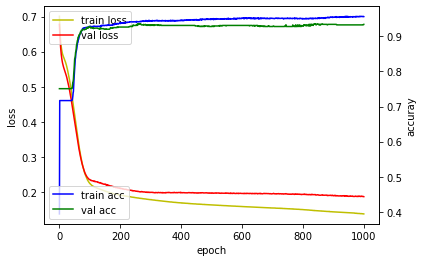





처리 중인 폴드 # 1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_741 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_556 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_742 (Dense)            (None, 8)                 264       
_________________________________________________________________
dropout_557 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_743 (Dense)            (None, 8)                 72        
_________________________________________________________________
dropout_558 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_744 (Dense)            (None, 2)                 18  

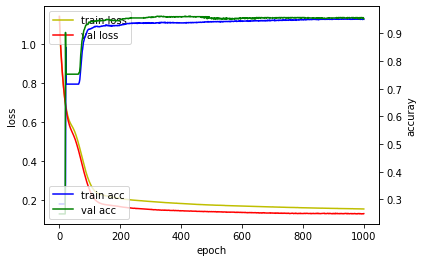





처리 중인 폴드 # 2
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_745 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_559 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_746 (Dense)            (None, 8)                 264       
_________________________________________________________________
dropout_560 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_747 (Dense)            (None, 8)                 72        
_________________________________________________________________
dropout_561 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_748 (Dense)            (None, 2)                 18  

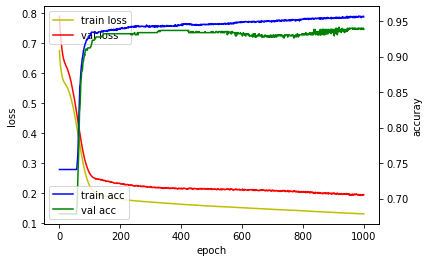





처리 중인 폴드 # 3
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_749 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_562 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_750 (Dense)            (None, 8)                 264       
_________________________________________________________________
dropout_563 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_751 (Dense)            (None, 8)                 72        
_________________________________________________________________
dropout_564 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_752 (Dense)            (None, 2)                 18  

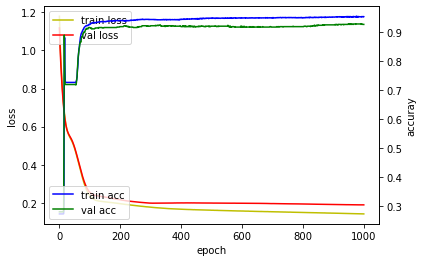





Activation: sigmoid   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 32 , 8 , 8 ]  BatchSize: 512   Dropout: 0.1
처리 중인 폴드 # 0
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_753 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_565 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_754 (Dense)            (None, 8)                 264       
_________________________________________________________________
dropout_566 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_755 (Dense)            (None, 8)                 72        
_________________________________________________________________
dropout_567 (Dropout)        (None, 8)                 0         
__

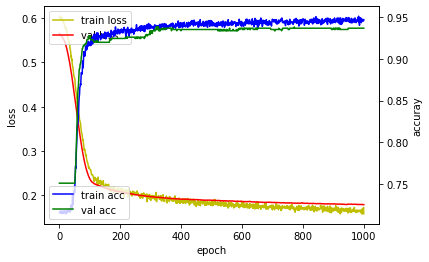





처리 중인 폴드 # 1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_757 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_568 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_758 (Dense)            (None, 8)                 264       
_________________________________________________________________
dropout_569 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_759 (Dense)            (None, 8)                 72        
_________________________________________________________________
dropout_570 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_760 (Dense)            (None, 2)                 18  

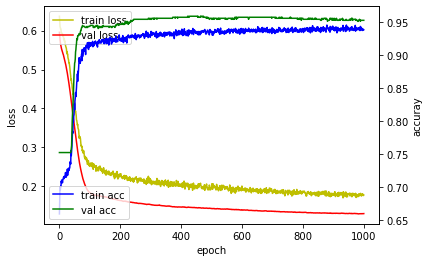





처리 중인 폴드 # 2
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_761 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_571 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_762 (Dense)            (None, 8)                 264       
_________________________________________________________________
dropout_572 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_763 (Dense)            (None, 8)                 72        
_________________________________________________________________
dropout_573 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_764 (Dense)            (None, 2)                 18  

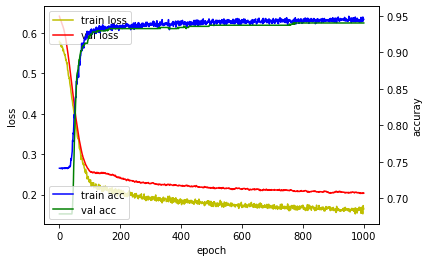





처리 중인 폴드 # 3
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_765 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_574 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_766 (Dense)            (None, 8)                 264       
_________________________________________________________________
dropout_575 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_767 (Dense)            (None, 8)                 72        
_________________________________________________________________
dropout_576 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_768 (Dense)            (None, 2)                 18  

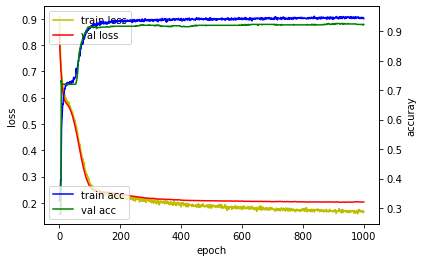





Activation: sigmoid   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 32 , 8 , 16 ]  BatchSize: 512   Dropout: 0
처리 중인 폴드 # 0
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_769 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_577 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_770 (Dense)            (None, 8)                 264       
_________________________________________________________________
dropout_578 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_771 (Dense)            (None, 16)                144       
_________________________________________________________________
dropout_579 (Dropout)        (None, 16)                0         
___

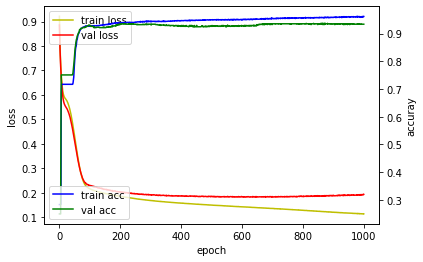





처리 중인 폴드 # 1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_773 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_580 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_774 (Dense)            (None, 8)                 264       
_________________________________________________________________
dropout_581 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_775 (Dense)            (None, 16)                144       
_________________________________________________________________
dropout_582 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_776 (Dense)            (None, 2)                 34  

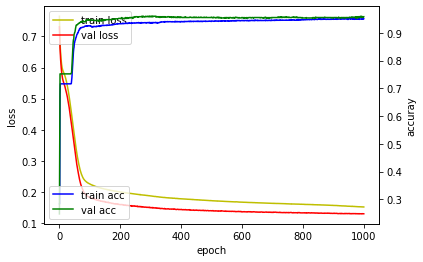





처리 중인 폴드 # 2
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_777 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_583 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_778 (Dense)            (None, 8)                 264       
_________________________________________________________________
dropout_584 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_779 (Dense)            (None, 16)                144       
_________________________________________________________________
dropout_585 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_780 (Dense)            (None, 2)                 34  

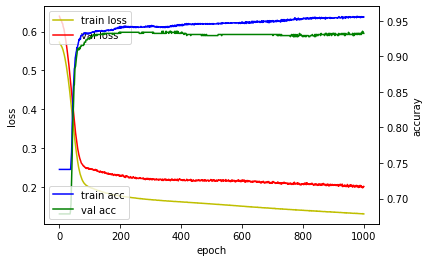





처리 중인 폴드 # 3
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_781 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_586 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_782 (Dense)            (None, 8)                 264       
_________________________________________________________________
dropout_587 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_783 (Dense)            (None, 16)                144       
_________________________________________________________________
dropout_588 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_784 (Dense)            (None, 2)                 34  

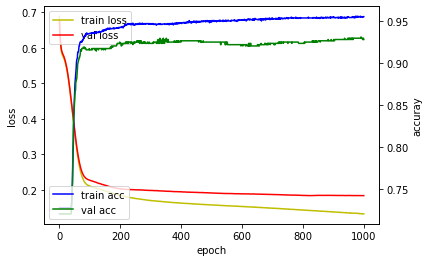





Activation: sigmoid   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 32 , 8 , 16 ]  BatchSize: 512   Dropout: 0.1
처리 중인 폴드 # 0
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_785 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_589 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_786 (Dense)            (None, 8)                 264       
_________________________________________________________________
dropout_590 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_787 (Dense)            (None, 16)                144       
_________________________________________________________________
dropout_591 (Dropout)        (None, 16)                0         
_

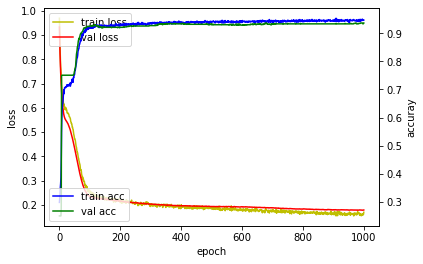





처리 중인 폴드 # 1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_789 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_592 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_790 (Dense)            (None, 8)                 264       
_________________________________________________________________
dropout_593 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_791 (Dense)            (None, 16)                144       
_________________________________________________________________
dropout_594 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_792 (Dense)            (None, 2)                 34  

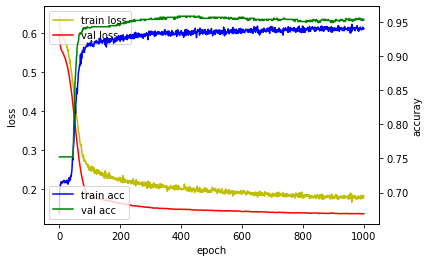





처리 중인 폴드 # 2
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_793 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_595 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_794 (Dense)            (None, 8)                 264       
_________________________________________________________________
dropout_596 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_795 (Dense)            (None, 16)                144       
_________________________________________________________________
dropout_597 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_796 (Dense)            (None, 2)                 34  

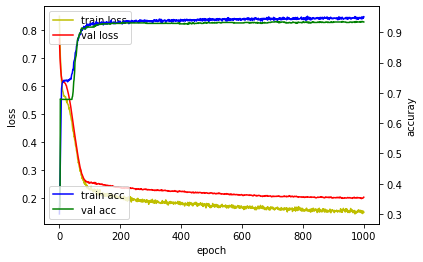





처리 중인 폴드 # 3
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_797 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_598 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_798 (Dense)            (None, 8)                 264       
_________________________________________________________________
dropout_599 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_799 (Dense)            (None, 16)                144       
_________________________________________________________________
dropout_600 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_800 (Dense)            (None, 2)                 34  

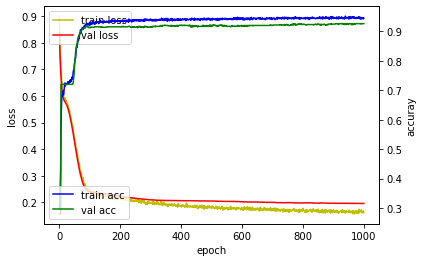





Activation: sigmoid   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 32 , 16 , 4 ]  BatchSize: 512   Dropout: 0
처리 중인 폴드 # 0
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_801 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_601 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_802 (Dense)            (None, 16)                528       
_________________________________________________________________
dropout_602 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_803 (Dense)            (None, 4)                 68        
_________________________________________________________________
dropout_603 (Dropout)        (None, 4)                 0         
___

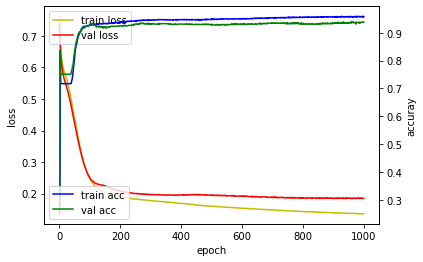





처리 중인 폴드 # 1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_805 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_604 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_806 (Dense)            (None, 16)                528       
_________________________________________________________________
dropout_605 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_807 (Dense)            (None, 4)                 68        
_________________________________________________________________
dropout_606 (Dropout)        (None, 4)                 0         
_________________________________________________________________
dense_808 (Dense)            (None, 2)                 10  

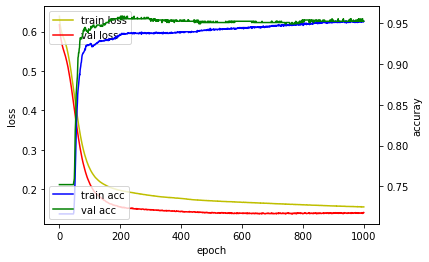





처리 중인 폴드 # 2
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_809 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_607 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_810 (Dense)            (None, 16)                528       
_________________________________________________________________
dropout_608 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_811 (Dense)            (None, 4)                 68        
_________________________________________________________________
dropout_609 (Dropout)        (None, 4)                 0         
_________________________________________________________________
dense_812 (Dense)            (None, 2)                 10  

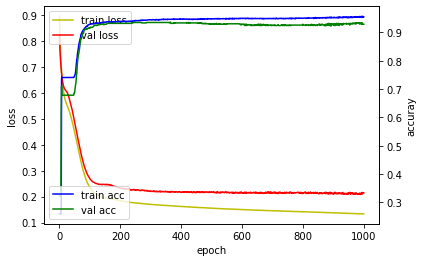





처리 중인 폴드 # 3
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_813 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_610 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_814 (Dense)            (None, 16)                528       
_________________________________________________________________
dropout_611 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_815 (Dense)            (None, 4)                 68        
_________________________________________________________________
dropout_612 (Dropout)        (None, 4)                 0         
_________________________________________________________________
dense_816 (Dense)            (None, 2)                 10  

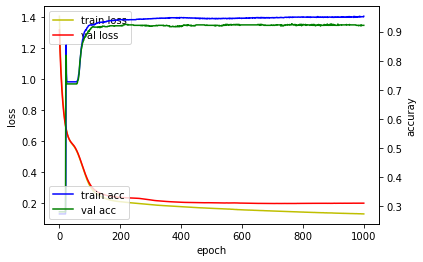





Activation: sigmoid   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 32 , 16 , 4 ]  BatchSize: 512   Dropout: 0.1
처리 중인 폴드 # 0
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_817 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_613 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_818 (Dense)            (None, 16)                528       
_________________________________________________________________
dropout_614 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_819 (Dense)            (None, 4)                 68        
_________________________________________________________________
dropout_615 (Dropout)        (None, 4)                 0         
_

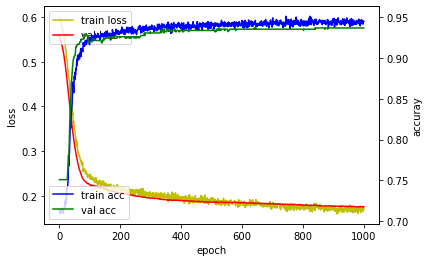





처리 중인 폴드 # 1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_821 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_616 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_822 (Dense)            (None, 16)                528       
_________________________________________________________________
dropout_617 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_823 (Dense)            (None, 4)                 68        
_________________________________________________________________
dropout_618 (Dropout)        (None, 4)                 0         
_________________________________________________________________
dense_824 (Dense)            (None, 2)                 10  

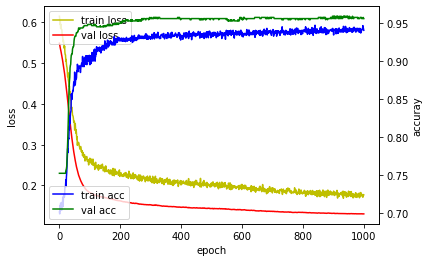





처리 중인 폴드 # 2
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_825 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_619 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_826 (Dense)            (None, 16)                528       
_________________________________________________________________
dropout_620 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_827 (Dense)            (None, 4)                 68        
_________________________________________________________________
dropout_621 (Dropout)        (None, 4)                 0         
_________________________________________________________________
dense_828 (Dense)            (None, 2)                 10  

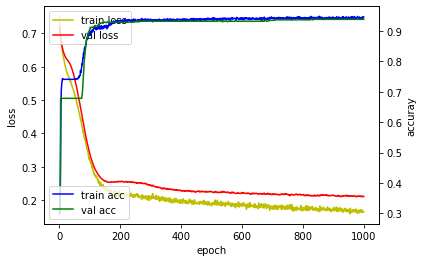





처리 중인 폴드 # 3
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_829 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_622 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_830 (Dense)            (None, 16)                528       
_________________________________________________________________
dropout_623 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_831 (Dense)            (None, 4)                 68        
_________________________________________________________________
dropout_624 (Dropout)        (None, 4)                 0         
_________________________________________________________________
dense_832 (Dense)            (None, 2)                 10  

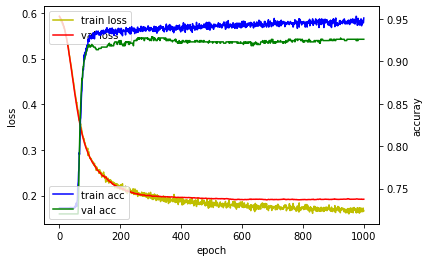





Activation: sigmoid   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 32 , 16 , 8 ]  BatchSize: 512   Dropout: 0
처리 중인 폴드 # 0
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_833 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_625 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_834 (Dense)            (None, 16)                528       
_________________________________________________________________
dropout_626 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_835 (Dense)            (None, 8)                 136       
_________________________________________________________________
dropout_627 (Dropout)        (None, 8)                 0         
___

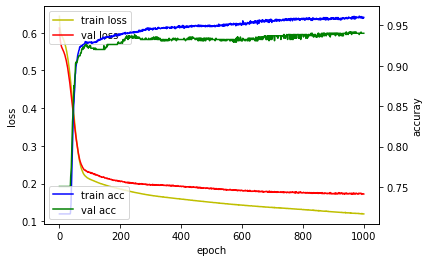





처리 중인 폴드 # 1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_837 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_628 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_838 (Dense)            (None, 16)                528       
_________________________________________________________________
dropout_629 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_839 (Dense)            (None, 8)                 136       
_________________________________________________________________
dropout_630 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_840 (Dense)            (None, 2)                 18  

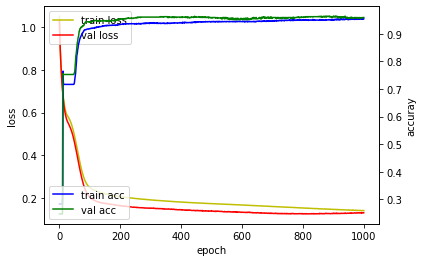





처리 중인 폴드 # 2
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_841 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_631 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_842 (Dense)            (None, 16)                528       
_________________________________________________________________
dropout_632 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_843 (Dense)            (None, 8)                 136       
_________________________________________________________________
dropout_633 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_844 (Dense)            (None, 2)                 18  

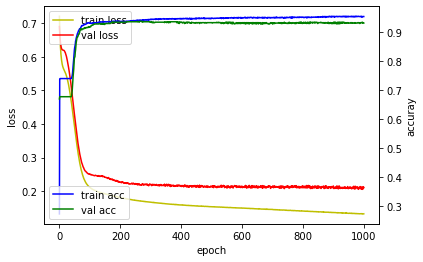





처리 중인 폴드 # 3
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_845 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_634 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_846 (Dense)            (None, 16)                528       
_________________________________________________________________
dropout_635 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_847 (Dense)            (None, 8)                 136       
_________________________________________________________________
dropout_636 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_848 (Dense)            (None, 2)                 18  

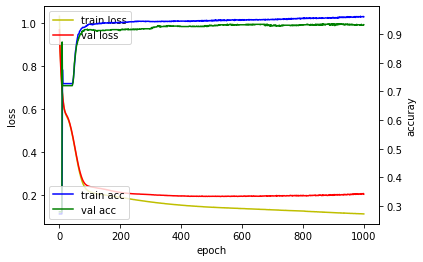





Activation: sigmoid   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 32 , 16 , 8 ]  BatchSize: 512   Dropout: 0.1
처리 중인 폴드 # 0
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_849 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_637 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_850 (Dense)            (None, 16)                528       
_________________________________________________________________
dropout_638 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_851 (Dense)            (None, 8)                 136       
_________________________________________________________________
dropout_639 (Dropout)        (None, 8)                 0         
_

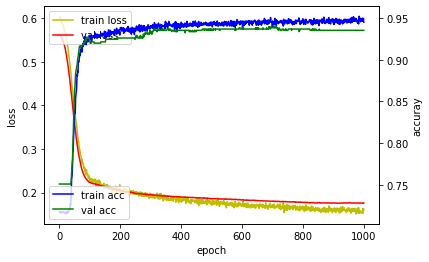





처리 중인 폴드 # 1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_853 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_640 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_854 (Dense)            (None, 16)                528       
_________________________________________________________________
dropout_641 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_855 (Dense)            (None, 8)                 136       
_________________________________________________________________
dropout_642 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_856 (Dense)            (None, 2)                 18  

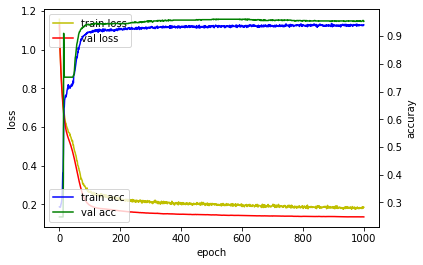





처리 중인 폴드 # 2
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_857 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_643 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_858 (Dense)            (None, 16)                528       
_________________________________________________________________
dropout_644 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_859 (Dense)            (None, 8)                 136       
_________________________________________________________________
dropout_645 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_860 (Dense)            (None, 2)                 18  

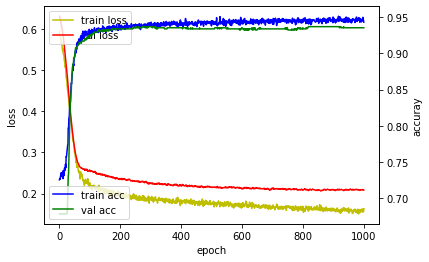





처리 중인 폴드 # 3
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_861 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_646 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_862 (Dense)            (None, 16)                528       
_________________________________________________________________
dropout_647 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_863 (Dense)            (None, 8)                 136       
_________________________________________________________________
dropout_648 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_864 (Dense)            (None, 2)                 18  

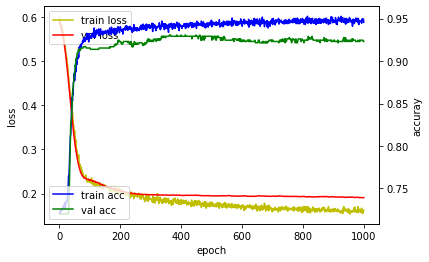





Activation: sigmoid   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 32 , 16 , 16 ]  BatchSize: 512   Dropout: 0
처리 중인 폴드 # 0
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_865 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_649 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_866 (Dense)            (None, 16)                528       
_________________________________________________________________
dropout_650 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_867 (Dense)            (None, 16)                272       
_________________________________________________________________
dropout_651 (Dropout)        (None, 16)                0         
__

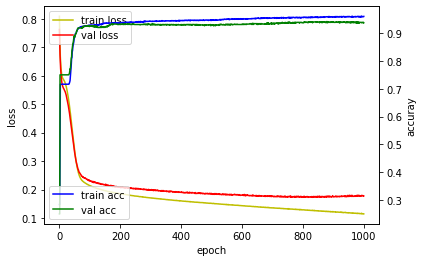





처리 중인 폴드 # 1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_869 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_652 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_870 (Dense)            (None, 16)                528       
_________________________________________________________________
dropout_653 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_871 (Dense)            (None, 16)                272       
_________________________________________________________________
dropout_654 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_872 (Dense)            (None, 2)                 34  

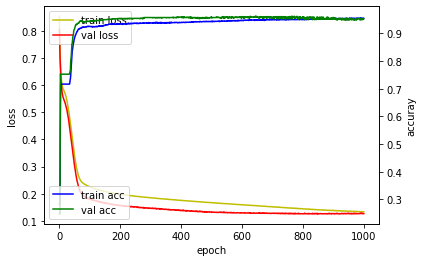





처리 중인 폴드 # 2
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_873 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_655 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_874 (Dense)            (None, 16)                528       
_________________________________________________________________
dropout_656 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_875 (Dense)            (None, 16)                272       
_________________________________________________________________
dropout_657 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_876 (Dense)            (None, 2)                 34  

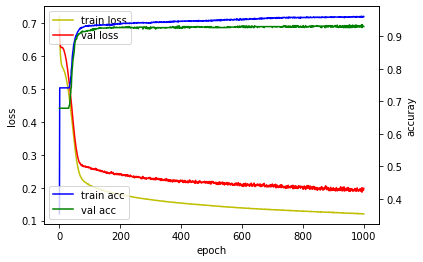





처리 중인 폴드 # 3
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_877 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_658 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_878 (Dense)            (None, 16)                528       
_________________________________________________________________
dropout_659 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_879 (Dense)            (None, 16)                272       
_________________________________________________________________
dropout_660 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_880 (Dense)            (None, 2)                 34  

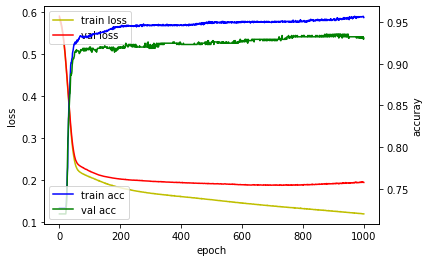





Activation: sigmoid   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 32 , 16 , 16 ]  BatchSize: 512   Dropout: 0.1
처리 중인 폴드 # 0
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_881 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_661 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_882 (Dense)            (None, 16)                528       
_________________________________________________________________
dropout_662 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_883 (Dense)            (None, 16)                272       
_________________________________________________________________
dropout_663 (Dropout)        (None, 16)                0         


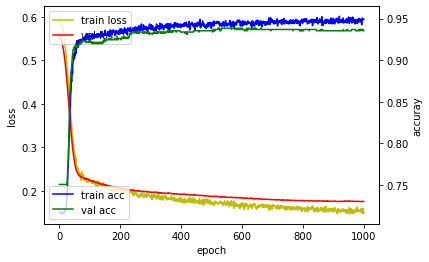





처리 중인 폴드 # 1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_885 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_664 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_886 (Dense)            (None, 16)                528       
_________________________________________________________________
dropout_665 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_887 (Dense)            (None, 16)                272       
_________________________________________________________________
dropout_666 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_888 (Dense)            (None, 2)                 34  

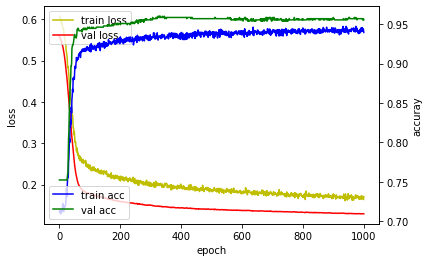





처리 중인 폴드 # 2
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_889 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_667 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_890 (Dense)            (None, 16)                528       
_________________________________________________________________
dropout_668 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_891 (Dense)            (None, 16)                272       
_________________________________________________________________
dropout_669 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_892 (Dense)            (None, 2)                 34  

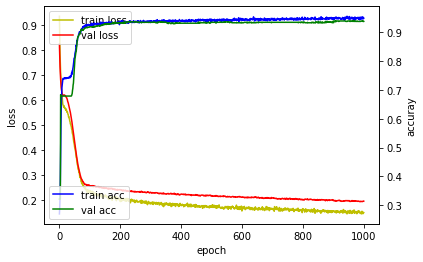





처리 중인 폴드 # 3
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_893 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_670 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_894 (Dense)            (None, 16)                528       
_________________________________________________________________
dropout_671 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_895 (Dense)            (None, 16)                272       
_________________________________________________________________
dropout_672 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_896 (Dense)            (None, 2)                 34  

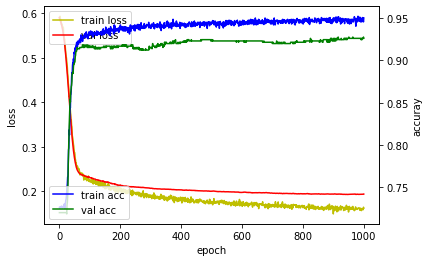





Activation: sigmoid   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 32 , 32 , 4 ]  BatchSize: 512   Dropout: 0
처리 중인 폴드 # 0
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_897 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_673 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_898 (Dense)            (None, 32)                1056      
_________________________________________________________________
dropout_674 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_899 (Dense)            (None, 4)                 132       
_________________________________________________________________
dropout_675 (Dropout)        (None, 4)                 0         
___

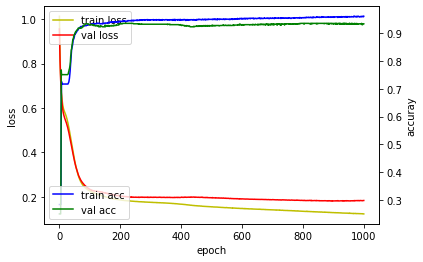





처리 중인 폴드 # 1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_901 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_676 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_902 (Dense)            (None, 32)                1056      
_________________________________________________________________
dropout_677 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_903 (Dense)            (None, 4)                 132       
_________________________________________________________________
dropout_678 (Dropout)        (None, 4)                 0         
_________________________________________________________________
dense_904 (Dense)            (None, 2)                 10  

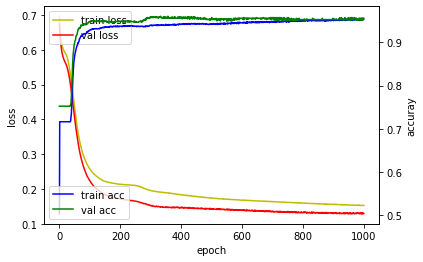





처리 중인 폴드 # 2
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_905 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_679 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_906 (Dense)            (None, 32)                1056      
_________________________________________________________________
dropout_680 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_907 (Dense)            (None, 4)                 132       
_________________________________________________________________
dropout_681 (Dropout)        (None, 4)                 0         
_________________________________________________________________
dense_908 (Dense)            (None, 2)                 10  

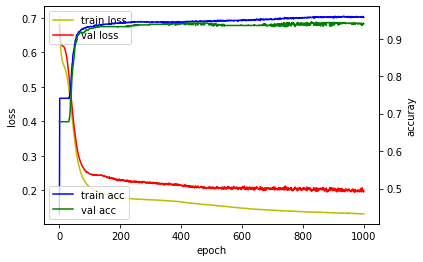





처리 중인 폴드 # 3
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_909 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_682 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_910 (Dense)            (None, 32)                1056      
_________________________________________________________________
dropout_683 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_911 (Dense)            (None, 4)                 132       
_________________________________________________________________
dropout_684 (Dropout)        (None, 4)                 0         
_________________________________________________________________
dense_912 (Dense)            (None, 2)                 10  

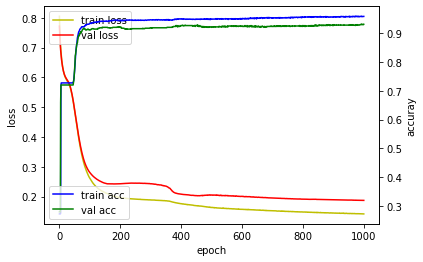





Activation: sigmoid   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 32 , 32 , 4 ]  BatchSize: 512   Dropout: 0.1
처리 중인 폴드 # 0
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_913 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_685 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_914 (Dense)            (None, 32)                1056      
_________________________________________________________________
dropout_686 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_915 (Dense)            (None, 4)                 132       
_________________________________________________________________
dropout_687 (Dropout)        (None, 4)                 0         
_

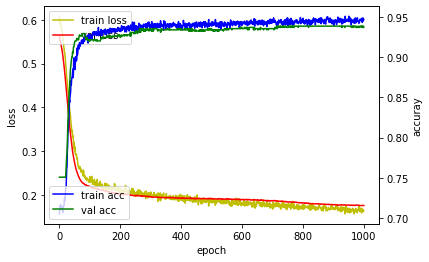





처리 중인 폴드 # 1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_917 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_688 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_918 (Dense)            (None, 32)                1056      
_________________________________________________________________
dropout_689 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_919 (Dense)            (None, 4)                 132       
_________________________________________________________________
dropout_690 (Dropout)        (None, 4)                 0         
_________________________________________________________________
dense_920 (Dense)            (None, 2)                 10  

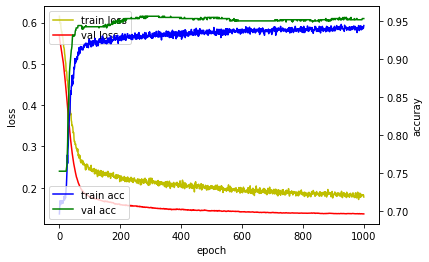





처리 중인 폴드 # 2
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_921 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_691 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_922 (Dense)            (None, 32)                1056      
_________________________________________________________________
dropout_692 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_923 (Dense)            (None, 4)                 132       
_________________________________________________________________
dropout_693 (Dropout)        (None, 4)                 0         
_________________________________________________________________
dense_924 (Dense)            (None, 2)                 10  

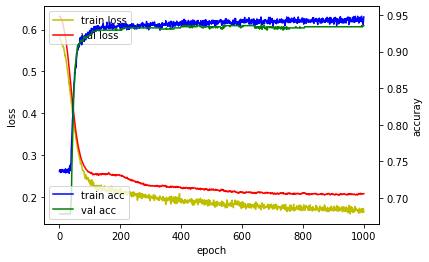





처리 중인 폴드 # 3
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_925 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_694 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_926 (Dense)            (None, 32)                1056      
_________________________________________________________________
dropout_695 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_927 (Dense)            (None, 4)                 132       
_________________________________________________________________
dropout_696 (Dropout)        (None, 4)                 0         
_________________________________________________________________
dense_928 (Dense)            (None, 2)                 10  

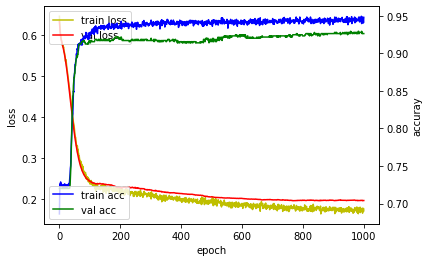





Activation: sigmoid   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 32 , 32 , 8 ]  BatchSize: 512   Dropout: 0
처리 중인 폴드 # 0
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_929 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_697 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_930 (Dense)            (None, 32)                1056      
_________________________________________________________________
dropout_698 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_931 (Dense)            (None, 8)                 264       
_________________________________________________________________
dropout_699 (Dropout)        (None, 8)                 0         
___

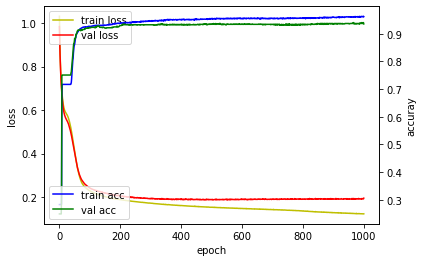





처리 중인 폴드 # 1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_933 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_700 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_934 (Dense)            (None, 32)                1056      
_________________________________________________________________
dropout_701 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_935 (Dense)            (None, 8)                 264       
_________________________________________________________________
dropout_702 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_936 (Dense)            (None, 2)                 18  

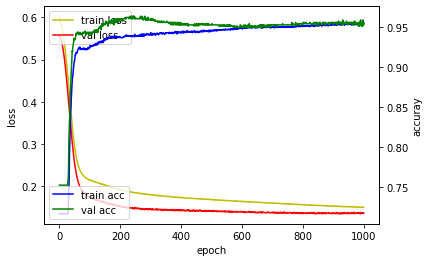





처리 중인 폴드 # 2
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_937 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_703 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_938 (Dense)            (None, 32)                1056      
_________________________________________________________________
dropout_704 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_939 (Dense)            (None, 8)                 264       
_________________________________________________________________
dropout_705 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_940 (Dense)            (None, 2)                 18  

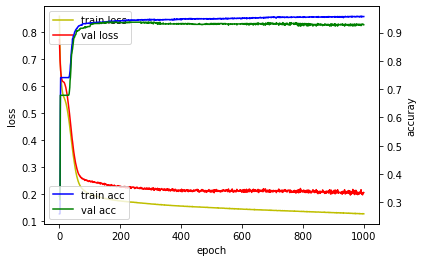





처리 중인 폴드 # 3
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_941 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_706 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_942 (Dense)            (None, 32)                1056      
_________________________________________________________________
dropout_707 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_943 (Dense)            (None, 8)                 264       
_________________________________________________________________
dropout_708 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_944 (Dense)            (None, 2)                 18  

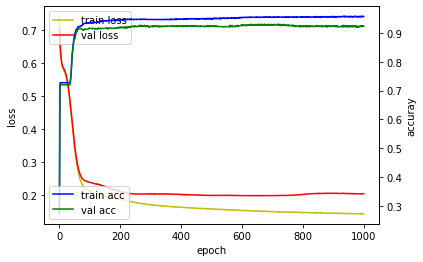





Activation: sigmoid   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 32 , 32 , 8 ]  BatchSize: 512   Dropout: 0.1
처리 중인 폴드 # 0
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_945 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_709 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_946 (Dense)            (None, 32)                1056      
_________________________________________________________________
dropout_710 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_947 (Dense)            (None, 8)                 264       
_________________________________________________________________
dropout_711 (Dropout)        (None, 8)                 0         
_

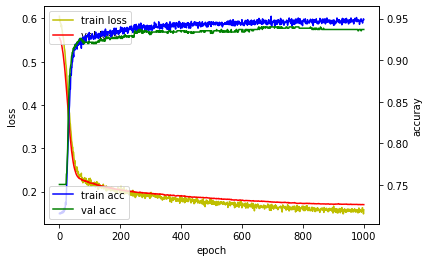





처리 중인 폴드 # 1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_949 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_712 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_950 (Dense)            (None, 32)                1056      
_________________________________________________________________
dropout_713 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_951 (Dense)            (None, 8)                 264       
_________________________________________________________________
dropout_714 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_952 (Dense)            (None, 2)                 18  

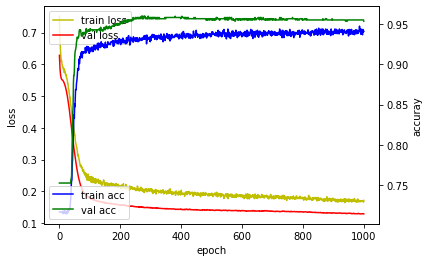





처리 중인 폴드 # 2
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_953 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_715 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_954 (Dense)            (None, 32)                1056      
_________________________________________________________________
dropout_716 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_955 (Dense)            (None, 8)                 264       
_________________________________________________________________
dropout_717 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_956 (Dense)            (None, 2)                 18  

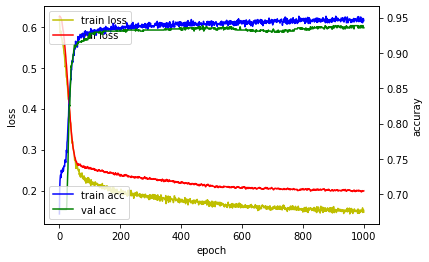





처리 중인 폴드 # 3
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_957 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_718 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_958 (Dense)            (None, 32)                1056      
_________________________________________________________________
dropout_719 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_959 (Dense)            (None, 8)                 264       
_________________________________________________________________
dropout_720 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_960 (Dense)            (None, 2)                 18  

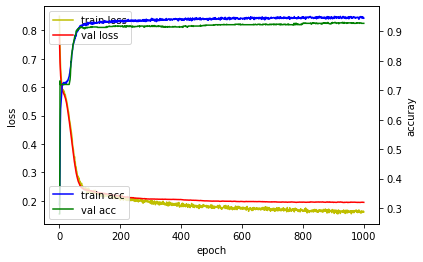





Activation: sigmoid   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 32 , 32 , 16 ]  BatchSize: 512   Dropout: 0
처리 중인 폴드 # 0
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_961 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_721 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_962 (Dense)            (None, 32)                1056      
_________________________________________________________________
dropout_722 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_963 (Dense)            (None, 16)                528       
_________________________________________________________________
dropout_723 (Dropout)        (None, 16)                0         
__

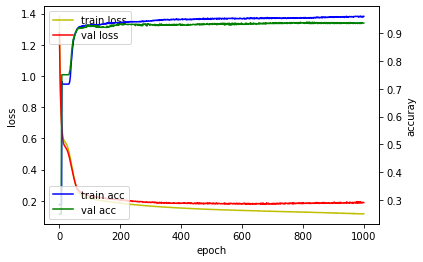





처리 중인 폴드 # 1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_965 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_724 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_966 (Dense)            (None, 32)                1056      
_________________________________________________________________
dropout_725 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_967 (Dense)            (None, 16)                528       
_________________________________________________________________
dropout_726 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_968 (Dense)            (None, 2)                 34  

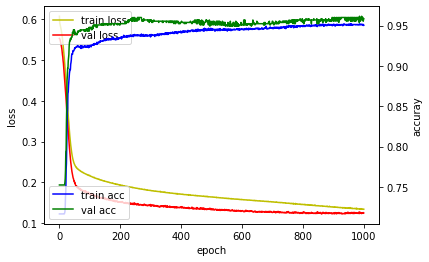





처리 중인 폴드 # 2
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_969 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_727 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_970 (Dense)            (None, 32)                1056      
_________________________________________________________________
dropout_728 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_971 (Dense)            (None, 16)                528       
_________________________________________________________________
dropout_729 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_972 (Dense)            (None, 2)                 34  

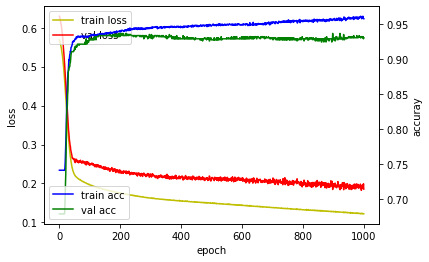





처리 중인 폴드 # 3
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_973 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_730 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_974 (Dense)            (None, 32)                1056      
_________________________________________________________________
dropout_731 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_975 (Dense)            (None, 16)                528       
_________________________________________________________________
dropout_732 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_976 (Dense)            (None, 2)                 34  

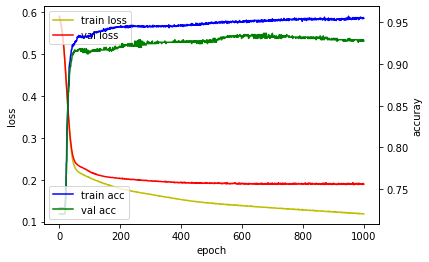





Activation: sigmoid   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 32 , 32 , 16 ]  BatchSize: 512   Dropout: 0.1
처리 중인 폴드 # 0
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_977 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_733 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_978 (Dense)            (None, 32)                1056      
_________________________________________________________________
dropout_734 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_979 (Dense)            (None, 16)                528       
_________________________________________________________________
dropout_735 (Dropout)        (None, 16)                0         


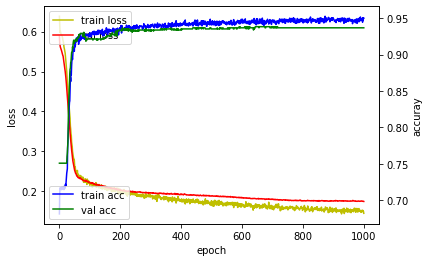





처리 중인 폴드 # 1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_981 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_736 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_982 (Dense)            (None, 32)                1056      
_________________________________________________________________
dropout_737 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_983 (Dense)            (None, 16)                528       
_________________________________________________________________
dropout_738 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_984 (Dense)            (None, 2)                 34  

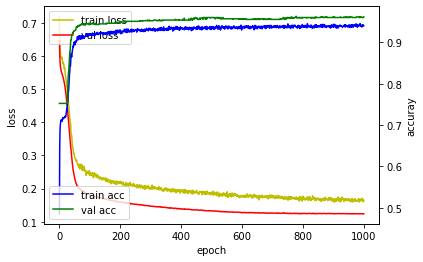





처리 중인 폴드 # 2
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_985 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_739 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_986 (Dense)            (None, 32)                1056      
_________________________________________________________________
dropout_740 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_987 (Dense)            (None, 16)                528       
_________________________________________________________________
dropout_741 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_988 (Dense)            (None, 2)                 34  

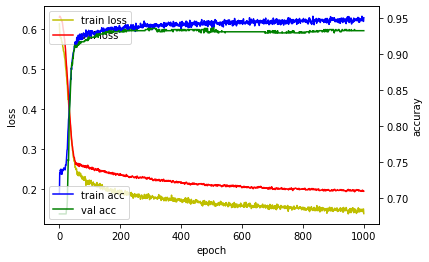





처리 중인 폴드 # 3
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_989 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_742 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_990 (Dense)            (None, 32)                1056      
_________________________________________________________________
dropout_743 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_991 (Dense)            (None, 16)                528       
_________________________________________________________________
dropout_744 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_992 (Dense)            (None, 2)                 34  

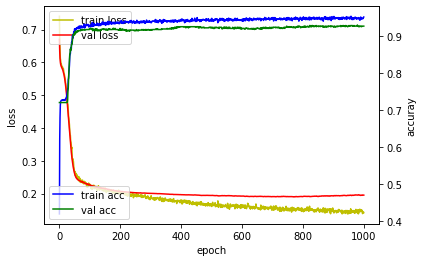





Activation: sigmoid   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 32 , 32 , 32 ]  BatchSize: 512   Dropout: 0
처리 중인 폴드 # 0
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_993 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_745 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_994 (Dense)            (None, 32)                1056      
_________________________________________________________________
dropout_746 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_995 (Dense)            (None, 32)                1056      
_________________________________________________________________
dropout_747 (Dropout)        (None, 32)                0         
__

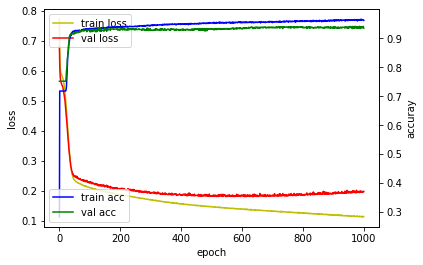





처리 중인 폴드 # 1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_997 (Dense)            (None, 32)                352       
_________________________________________________________________
dropout_748 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_998 (Dense)            (None, 32)                1056      
_________________________________________________________________
dropout_749 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_999 (Dense)            (None, 32)                1056      
_________________________________________________________________
dropout_750 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_1000 (Dense)           (None, 2)                 66  

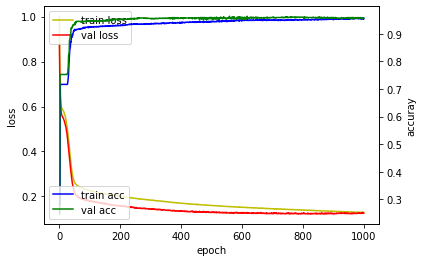





처리 중인 폴드 # 2
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1001 (Dense)           (None, 32)                352       
_________________________________________________________________
dropout_751 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_1002 (Dense)           (None, 32)                1056      
_________________________________________________________________
dropout_752 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_1003 (Dense)           (None, 32)                1056      
_________________________________________________________________
dropout_753 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_1004 (Dense)           (None, 2)                 66  

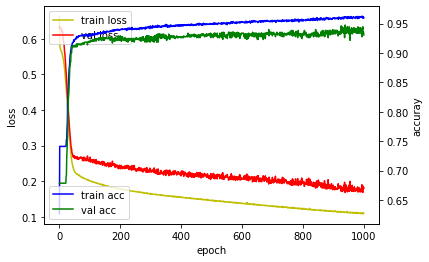





처리 중인 폴드 # 3
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1005 (Dense)           (None, 32)                352       
_________________________________________________________________
dropout_754 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_1006 (Dense)           (None, 32)                1056      
_________________________________________________________________
dropout_755 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_1007 (Dense)           (None, 32)                1056      
_________________________________________________________________
dropout_756 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_1008 (Dense)           (None, 2)                 66  

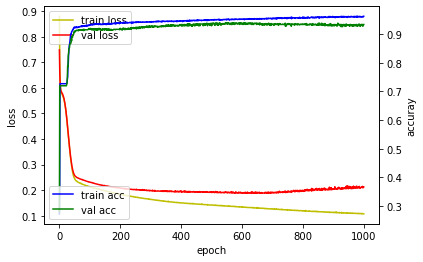





Activation: sigmoid   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 32 , 32 , 32 ]  BatchSize: 512   Dropout: 0.1
처리 중인 폴드 # 0
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1009 (Dense)           (None, 32)                352       
_________________________________________________________________
dropout_757 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_1010 (Dense)           (None, 32)                1056      
_________________________________________________________________
dropout_758 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_1011 (Dense)           (None, 32)                1056      
_________________________________________________________________
dropout_759 (Dropout)        (None, 32)                0         


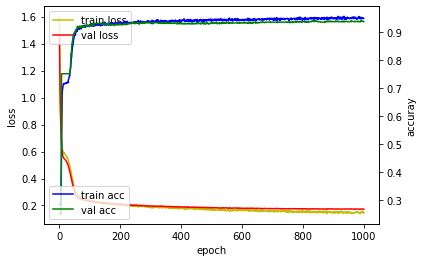





처리 중인 폴드 # 1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1013 (Dense)           (None, 32)                352       
_________________________________________________________________
dropout_760 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_1014 (Dense)           (None, 32)                1056      
_________________________________________________________________
dropout_761 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_1015 (Dense)           (None, 32)                1056      
_________________________________________________________________
dropout_762 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_1016 (Dense)           (None, 2)                 66  

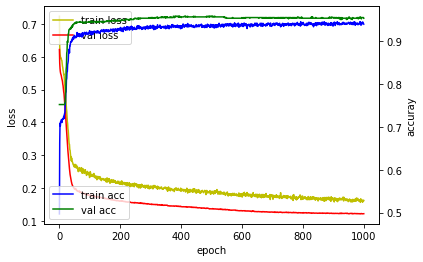





처리 중인 폴드 # 2
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1017 (Dense)           (None, 32)                352       
_________________________________________________________________
dropout_763 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_1018 (Dense)           (None, 32)                1056      
_________________________________________________________________
dropout_764 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_1019 (Dense)           (None, 32)                1056      
_________________________________________________________________
dropout_765 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_1020 (Dense)           (None, 2)                 66  

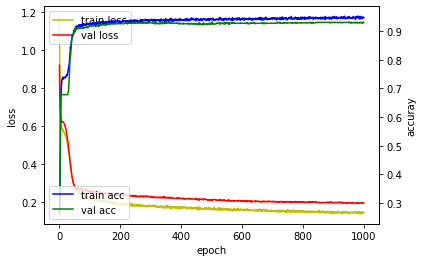





처리 중인 폴드 # 3
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1021 (Dense)           (None, 32)                352       
_________________________________________________________________
dropout_766 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_1022 (Dense)           (None, 32)                1056      
_________________________________________________________________
dropout_767 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_1023 (Dense)           (None, 32)                1056      
_________________________________________________________________
dropout_768 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_1024 (Dense)           (None, 2)                 66  

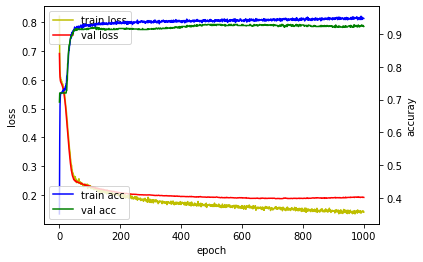

In [41]:
import numpy as np

num_epochs = 1000


actiFunc = ['relu', 'sigmoid']
lossFunc = ['categorical_crossentropy']
hidden = [3]
node = [
    [16, 8, 4], [16, 8, 8], [16, 8, 16], [16, 16, 4], [16, 16, 8], [16, 16, 16],
    [32, 8, 4], [32, 8, 8], [32, 8, 16], [32, 16, 4], [32, 16, 8], [32, 16, 16],
    [32, 32, 4], [32, 32, 8], [32, 32, 16], [32, 32, 32]
]
batchSize = [512]
dropout = [0, 0.1]

all_acc_histories = []
all_loss_histories = []

prev_max_acc = 0

fold = 4
num_fold = len(myData) // fold


for i in range(len(actiFunc)):
    for j in range(len(lossFunc)):
        for k in range(len(hidden)):
            for l in range(len(node)):
                for m in range(len(batchSize)):
                    for n in range(len(dropout)):
                        print('Activation:', actiFunc[i] , '  Loss:', lossFunc[j] , '  HiddenLayer:', hidden[k] , '  Node:[', node[l][0], ',', node[l][1] , ',', node[l][2], ']  BatchSize:', batchSize[m], '  Dropout:', dropout[n])
    
                        for o in range(fold):
                            print('처리 중인 폴드 #', o)
                            val_data = myData[o * num_fold: (o + 1) * num_fold]
                            val_label = myLabel[o * num_fold: (o + 1) * num_fold]
                    
                            train_data = np.concatenate([myData[:o * num_fold], myData[(o + 1) * num_fold:]], axis=0)
                            train_label = np.concatenate([myLabel[:o * num_fold], myLabel[(o + 1) * num_fold:]], axis=0)
                        
    
    
    
    
                            model = build_model(actiFunc[i], lossFunc[j], hidden[k], node[l], dropout[n])
                            model.summary()
                            history = model.fit(train_data, train_label, validation_data=(val_data, val_label), epochs=num_epochs, batch_size=batchSize[m], verbose=False)
    
                            acc_history = history.history['val_acc']
                            all_acc_histories.append(acc_history)
                            loss_history = history.history['val_loss']
                            all_loss_histories.append(loss_history)
    
                            print('loss min :', min(loss_history), '  acc max:', max(acc_history))
                            print('loss mean :', np.mean(loss_history), '  acc mean:', np.mean(acc_history))
            
            
                            if(prev_max_acc < max(acc_history)):
                                prev_max_acc = max(acc_history)
                                model.save('EOG_Filtering_model.h5')
                            
                                print()
                                print('model save!!!')
                                print('Activation:', actiFunc[i] , '  Loss:', lossFunc[j] , '  HiddenLayer:', hidden[k] , '  Node:[', node[l][0], ',', node[l][1] , ',', node[l][2], ']  BatchSize:', batchSize[m], '  Dropout:', dropout[n])
                            
            
            
                            fig, loss_ax = plt.subplots()
                            acc_ax = loss_ax.twinx()

                            loss_ax.plot(history.history['loss'], 'y', label='train loss')
                            loss_ax.plot(history.history['val_loss'], 'r', label='val loss')

                            acc_ax.plot(history.history['acc'], 'b', label='train acc')
                            acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
                            
                            loss_ax.set_xlabel('epoch')
                            loss_ax.set_ylabel('loss')
                            acc_ax.set_ylabel('accuray')

                            loss_ax.legend(loc='upper left')
                            acc_ax.legend(loc='lower left')

                            plt.show()
                        
                        
                            print()
                            print()
                            print('=======================================================================================================')
                            print()
                            print()